In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
folder_path = '/content/drive/MyDrive/Electricity-Power'
os.chdir(folder_path)


Mounted at /content/drive


In [4]:
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import gc

In [5]:
import re
def extract_first_part(s):
    # Find the first underscore followed by a digit
    match = re.search(r'_(?=\d)', s)
    if match:
        return s[:match.start()]
    else:
        return s

## 1. Market Trends & Price Fluctuations (10 points)


#### How do electricity prices fluctuate hourly, daily, and weekly across differt countries?


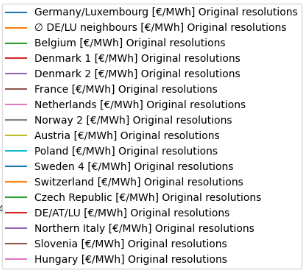

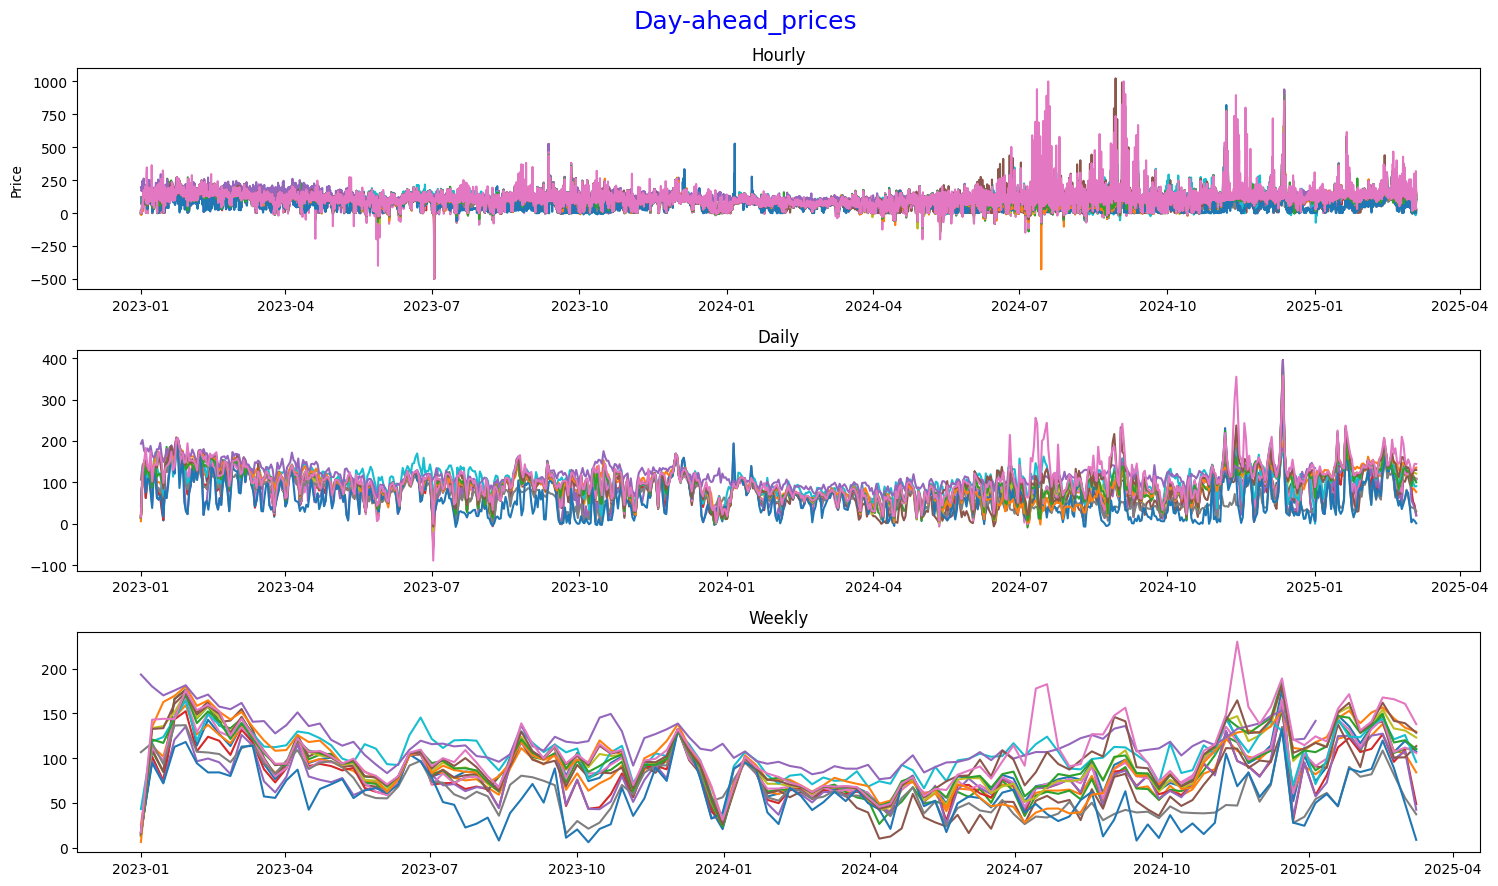

In [6]:
path = 'delimiter/'
for full_name in os.listdir(path):
    name = full_name.split(".")[0]
    if 'price' in name.lower() :
      df = pd.read_csv(path+full_name)
      # Set Time as index
      df.set_index('End date', inplace=True)
      df.index = pd.to_datetime(df.index)
      df.drop('Start date', axis=1, inplace=True)
      fig, axs = plt.subplots(3, figsize=(15, 9))
      for col in df.columns:
        # Hourly
        monthly_data = df.resample('H').mean()
        axs[0].plot(monthly_data.index, monthly_data[col], label =col)
        axs[0].set_title('Hourly')
        axs[0].set_ylabel('Price')
        # axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

        # Weekly
        weekly_data = df.resample('D').mean()
        axs[1].plot(weekly_data.index, weekly_data[col], label =col)
        axs[1].set_title('Daily')


        # Daily
        monthly_data = df.resample('W').mean()
        axs[2].plot(monthly_data.index, monthly_data[col], label =col)
        axs[2].set_title('Weekly')
      for ax in axs:
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

      fig.suptitle(extract_first_part(name), fontsize=18, color ='blue')
      plt.tight_layout()
      plt.show()

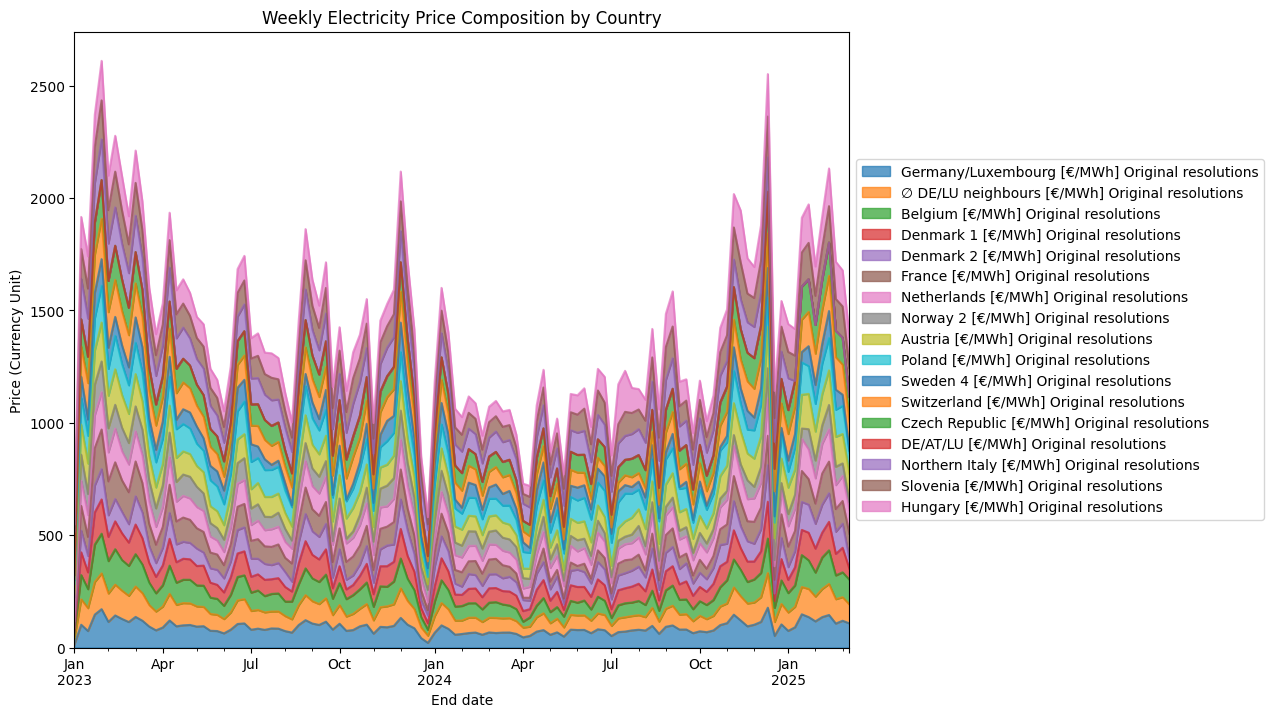

In [ ]:
weekly_data = df.resample('W').mean()
weekly_data.plot.area(figsize=(10,8), alpha=0.7)
plt.title('Weekly Electricity Price Composition by Country')
plt.ylabel('Price (Currency Unit)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


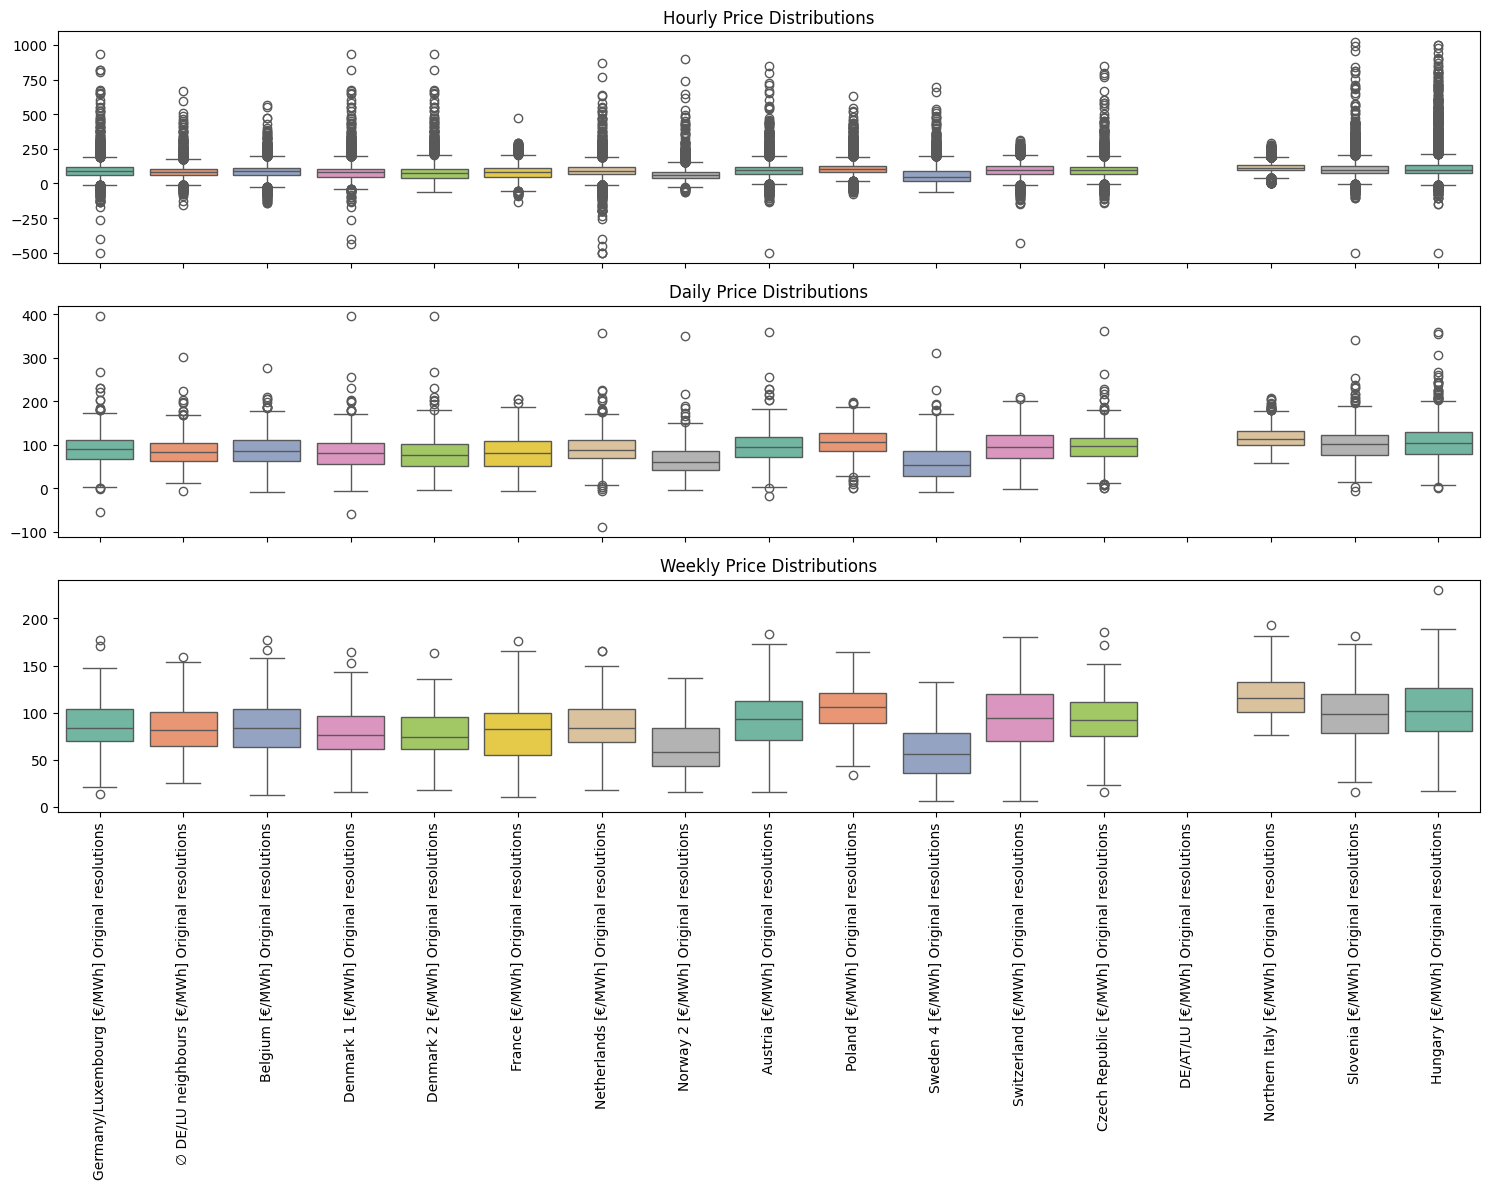

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, ax = plt.subplots(3, 1, figsize=(15, 12))

# Hourly distribution
sns.boxplot(data=df.resample('H').mean(), ax=ax[0], palette='Set2')
ax[0].set_title('Hourly Price Distributions')
ax[0].tick_params(labelbottom=False)  # Hide x-axis labels

# Daily distribution
sns.boxplot(data=df.resample('D').mean(), ax=ax[1], palette='Set2')
ax[1].set_title('Daily Price Distributions')
ax[1].tick_params(labelbottom=False)  # Hide x-axis labels

# Weekly distribution
sns.boxplot(data=df.resample('W').mean(), ax=ax[2], palette='Set2')
ax[2].set_title('Weekly Price Distributions')
ax[2].tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()


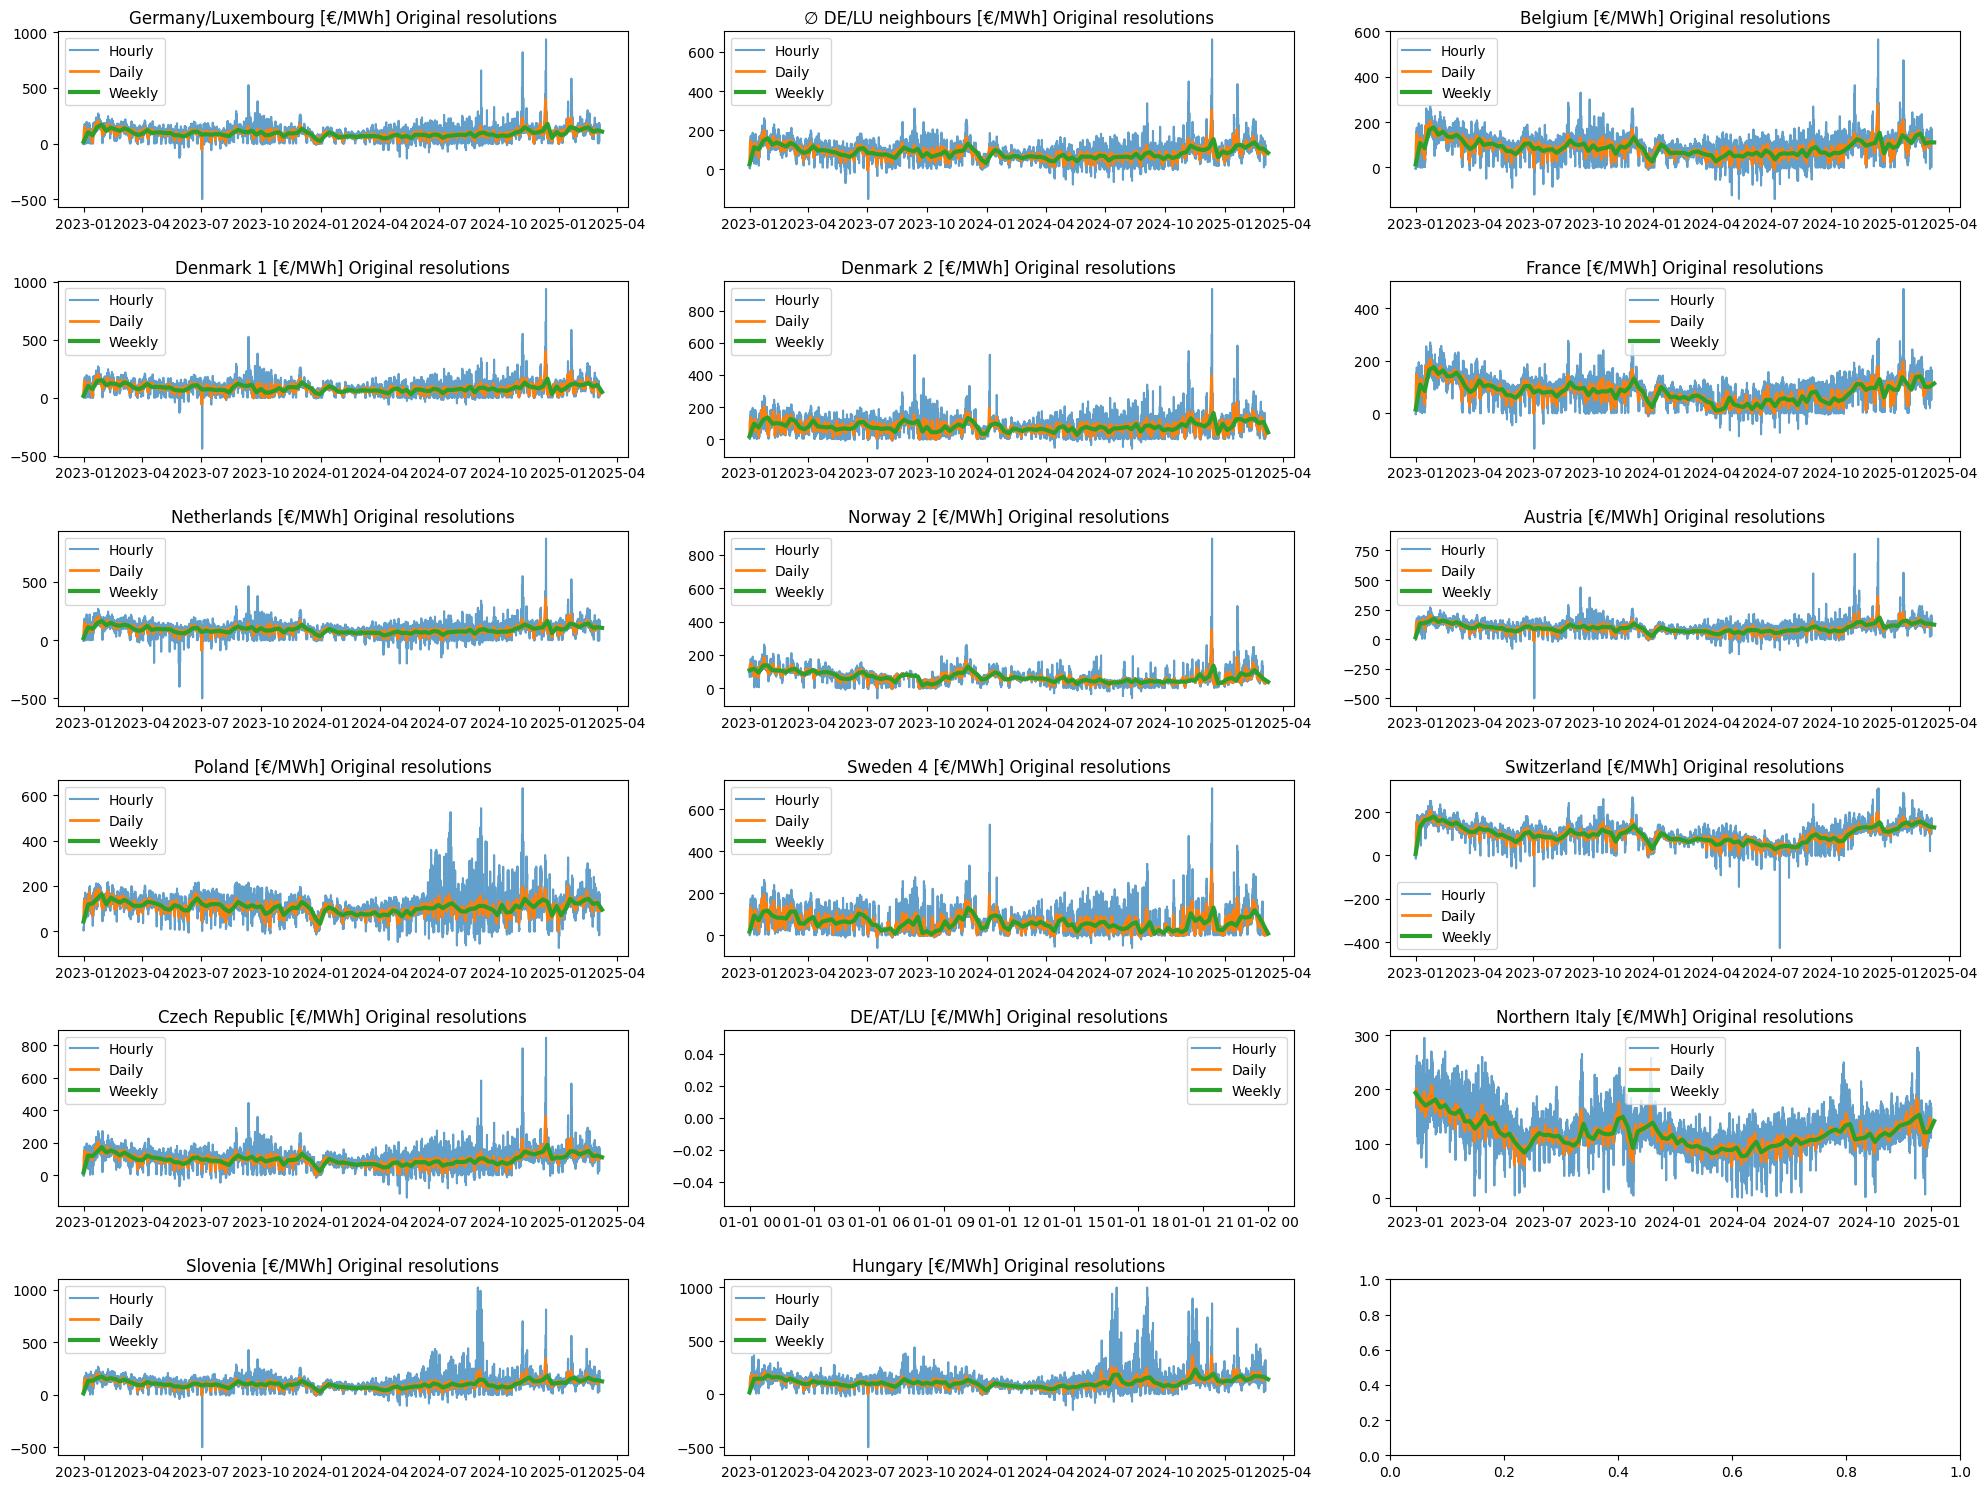

In [ ]:
import matplotlib.pyplot as plt

countries = df.columns
n_cols = 3
n_rows = -(-len(countries) // n_cols)  # Ceiling division

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 15))

for idx, country in enumerate(countries):
    row = idx // n_cols
    col = idx % n_cols
    ax = axs[row, col]

    hourly = df[country].resample('H').mean()
    daily = df[country].resample('D').mean()
    weekly = df[country].resample('W').mean()

    ax.plot(hourly, label='Hourly', alpha=0.7)
    ax.plot(daily, label='Daily', linewidth=2)
    ax.plot(weekly, label='Weekly', linewidth=3)

    ax.set_title(country)
    ax.legend()

# Automatically adjust subplot spacing to prevent overlap
fig.tight_layout(h_pad=2)  # Increase height padding between subplots

plt.show()


#### How do electricity consumption patterns change in the same timeframes, and how does this impact pricing?


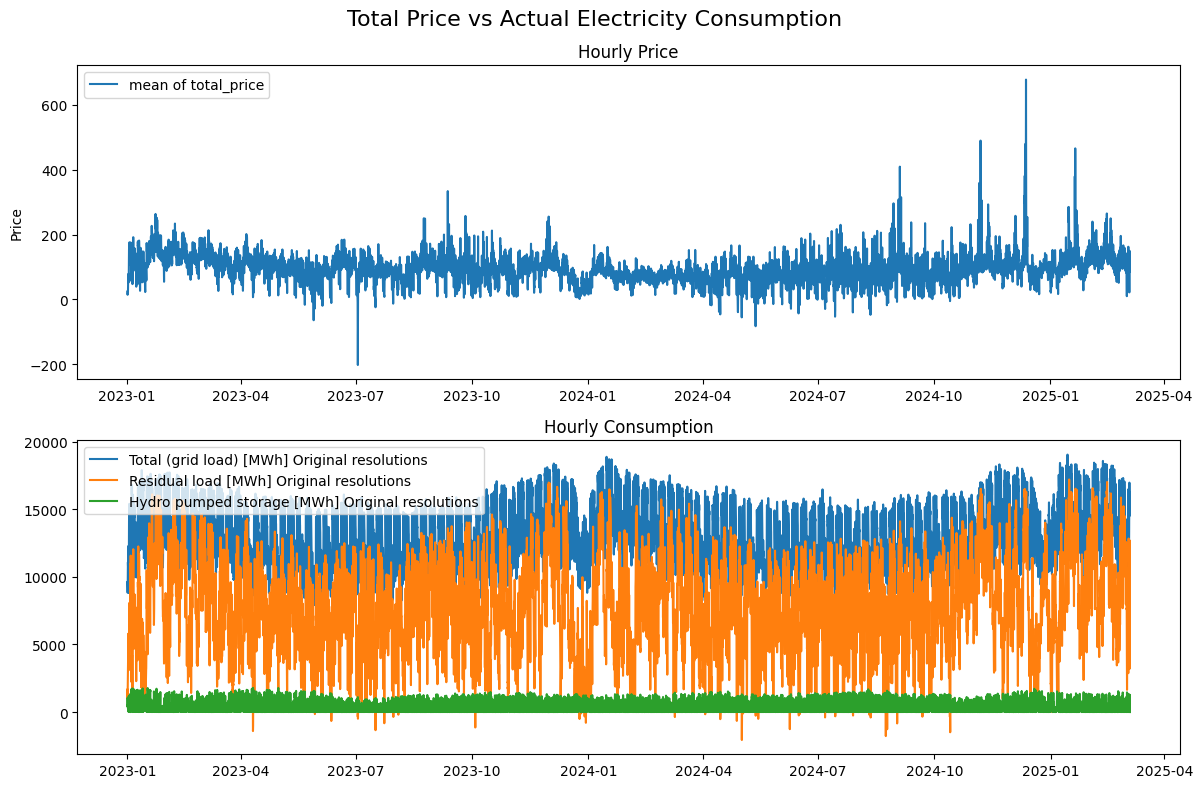

In [ ]:
path = 'delimiter/'
for full_name in os.listdir(path):
    name = full_name.split(".")[0]
    if 'price' in name.lower()   :
      df = pd.read_csv(path+full_name)
      df.set_index('End date', inplace=True)
      df.index = pd.to_datetime(df.index)
      df.drop('Start date', axis=1, inplace=True)

    if ('consumption' in name.lower() and 'actual' in name.lower()):
      cons = pd.read_csv(path+full_name)
      cons.set_index('End date', inplace=True)
      cons.index = pd.to_datetime(cons.index)
      cons.drop('Start date', axis=1, inplace=True)
fig, axs = plt.subplots(2, figsize=(12, 8))
# Hourly
hourly_data = df.resample('H').mean()
hourly_data['total_price'] = hourly_data.mean(axis=1)
axs[0].plot(hourly_data.index, hourly_data['total_price'], label ='mean of total_price')
axs[0].set_title('Hourly Price')
axs[0].set_ylabel('Price')
axs[0].legend()
for col in cons.columns:
  hourly_data = cons.resample('H').mean()
  axs[1].plot(hourly_data.index, hourly_data[col], label =col)
  axs[1].set_title('Hourly Consumption')
  axs[1].legend()

for ax in axs:
  box = ax.get_position()
  ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

fig.suptitle('Total Price vs Actual Electricity Consumption', fontsize=16 , )
plt.tight_layout()
plt.show()

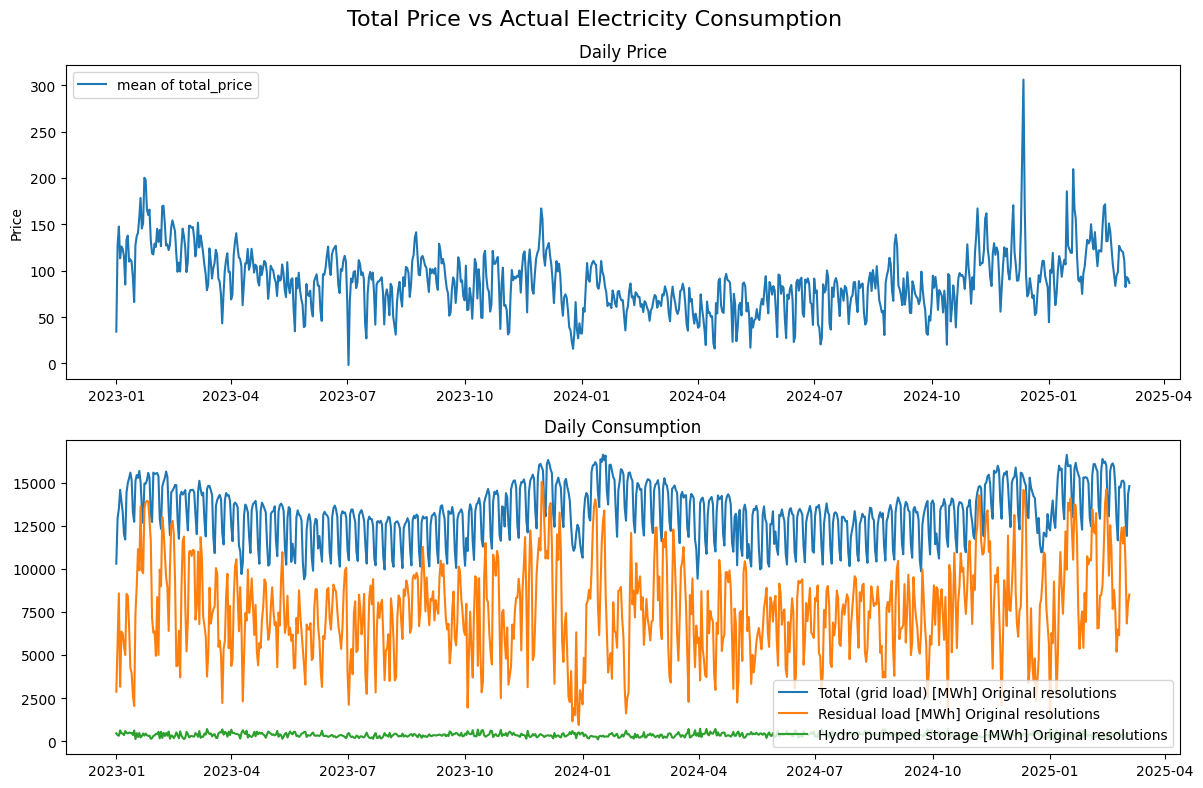

In [ ]:
path = 'delimiter/'
for full_name in os.listdir(path):
    name = full_name.split(".")[0]
    if 'price' in name.lower()   :
      df = pd.read_csv(path+full_name)
      df.set_index('End date', inplace=True)
      df.index = pd.to_datetime(df.index)
      df.drop('Start date', axis=1, inplace=True)

    if ('consumption' in name.lower() and 'actual' in name.lower()):
      cons = pd.read_csv(path+full_name)
      cons.set_index('End date', inplace=True)
      cons.index = pd.to_datetime(cons.index)
      cons.drop('Start date', axis=1, inplace=True)
fig, axs = plt.subplots(2, figsize=(12, 8))
# Hourly
hourly_data = df.resample('D').mean()
hourly_data['total_price'] = hourly_data.mean(axis=1)
axs[0].plot(hourly_data.index, hourly_data['total_price'], label ='mean of total_price')
axs[0].set_title('Daily Price')
axs[0].set_ylabel('Price')
axs[0].legend()
for col in cons.columns:
  hourly_data = cons.resample('D').mean()
  axs[1].plot(hourly_data.index, hourly_data[col], label =col)
  axs[1].set_title('Daily Consumption')
  axs[1].legend(loc='lower right')

for ax in axs:
  box = ax.get_position()
  ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

fig.suptitle('Total Price vs Actual Electricity Consumption', fontsize=16 , )
plt.tight_layout()
plt.show()

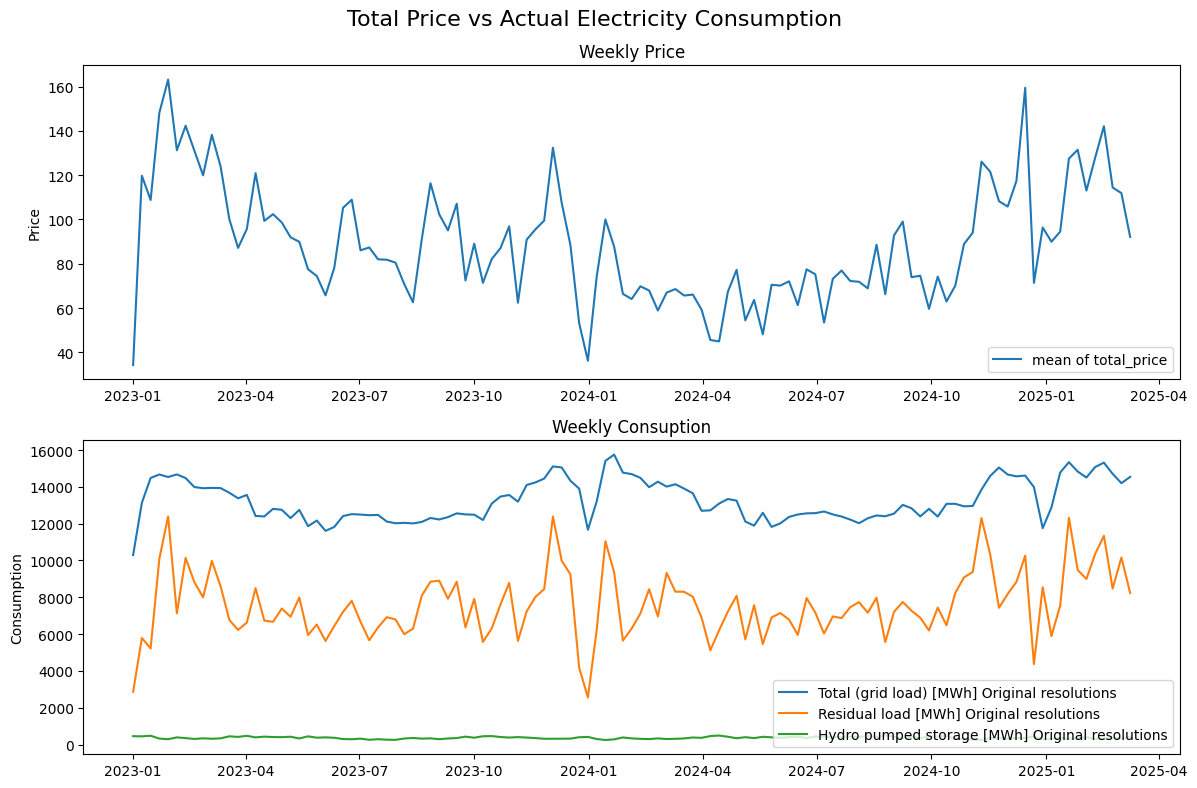

In [ ]:
path = 'delimiter/'
for full_name in os.listdir(path):
    name = full_name.split(".")[0]
    if 'price' in name.lower()   :
      df = pd.read_csv(path+full_name)
      df.set_index('End date', inplace=True)
      df.index = pd.to_datetime(df.index)
      df.drop('Start date', axis=1, inplace=True)

    if ('consumption' in name.lower() and 'actual' in name.lower()):
      cons = pd.read_csv(path+full_name)
      cons.set_index('End date', inplace=True)
      cons.index = pd.to_datetime(cons.index)
      cons.drop('Start date', axis=1, inplace=True)
fig, axs = plt.subplots(2, figsize=(12, 8))
# Hourly
hourly_data = df.resample('W').mean()
hourly_data['total_price'] = hourly_data.mean(axis=1)
axs[0].plot(hourly_data.index, hourly_data['total_price'], label ='mean of total_price')
axs[0].set_title('Weekly Price')
axs[0].set_ylabel('Price')
axs[0].legend()
for col in cons.columns:
  hourly_data = cons.resample('W').mean()
  axs[1].plot(hourly_data.index, hourly_data[col], label =col)
  axs[1].set_ylabel('Consumption')
  axs[1].set_title('Weekly Consuption')
  axs[1].legend(loc='lower right')

for ax in axs:
  box = ax.get_position()
  ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

fig.suptitle('Total Price vs Actual Electricity Consumption', fontsize=16 , )
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Forecast Error (MWh)')

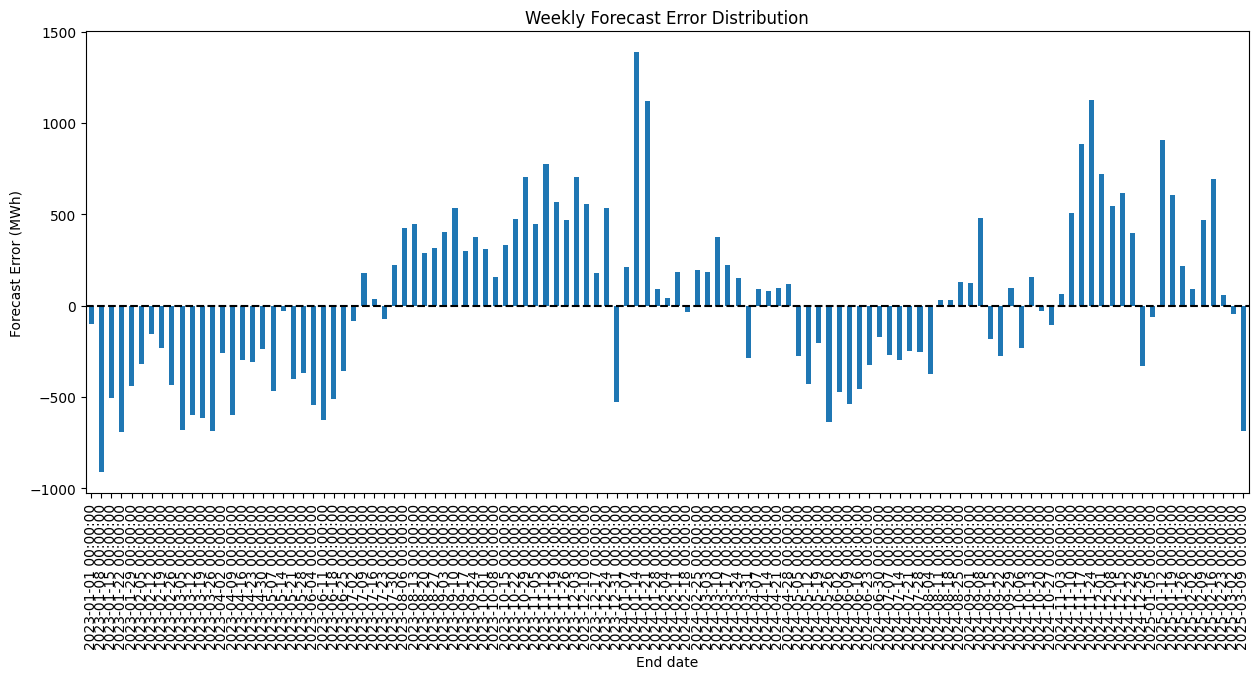

In [ ]:
path = 'delimiter/'
for full_name in os.listdir(path):
    name = full_name.split(".")[0]
    if ('consumption' in name.lower() and 'actual' in name.lower()):
      act_cons = pd.read_csv(path+full_name)
      act_cons.set_index('End date', inplace=True)
      act_cons.index = pd.to_datetime(act_cons.index)
      act_cons.drop('Start date', axis=1, inplace=True)
    if ('consumption' in name.lower() and 'forecast' in name.lower()):
      fore_cons = pd.read_csv(path+full_name)
      fore_cons.set_index('End date', inplace=True)
      fore_cons.index = pd.to_datetime(fore_cons.index)
      fore_cons.drop('Start date', axis=1, inplace=True)
fore_cons.columns
forecast_error = act_cons['Total (grid load) [MWh] Original resolutions'] - \
                fore_cons['Total (grid load) [MWh] Original resolutions']

plt.figure(figsize=(15,6))
forecast_error.resample('W').mean().plot(kind='bar',
    title='Weekly Forecast Error Distribution')
plt.axhline(0, color='black', linestyle='--')
plt.ylabel('Forecast Error (MWh)')


Temporal Heatmap with Price Overlay

KeyError: datetime.date(2023, 1, 1)

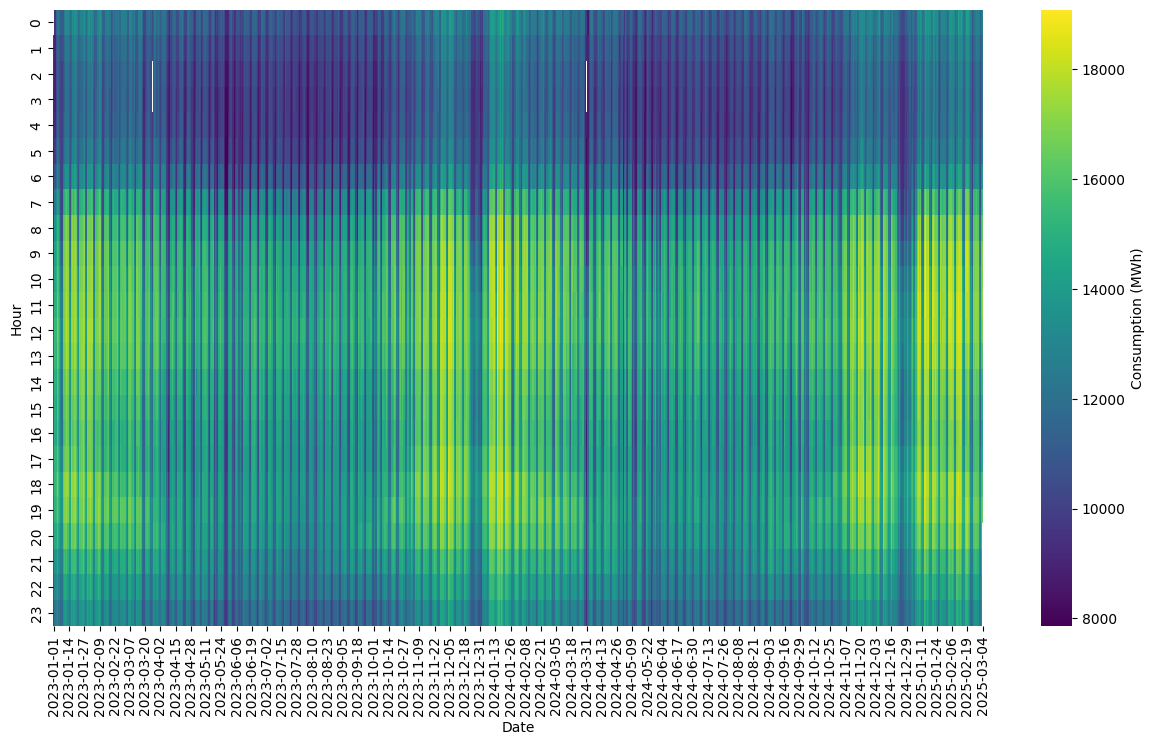

In [ ]:
path = 'delimiter/'
for full_name in os.listdir(path):
    name = full_name.split(".")[0]
    if 'price' in name.lower()   :
      df = pd.read_csv(path+full_name)
      df.set_index('End date', inplace=True)
      df.index = pd.to_datetime(df.index)
      df.drop('Start date', axis=1, inplace=True)

    if ('consumption' in name.lower() and 'actual' in name.lower()):
      cons = pd.read_csv(path+full_name)
      cons.set_index('End date', inplace=True)
      cons.index = pd.to_datetime(cons.index)
      cons.drop('Start date', axis=1, inplace=True)
# Combine consumption and pricing data
combined = pd.merge(cons['Total (grid load) [MWh] Original resolutions'],
                    df.mean(axis=1).rename('Average Price'),
                    left_index=True, right_index=True, how='inner')

combined['Hour'] = combined.index.hour
combined['Date'] = combined.index.date

# Resample and create the pivot table
heatmap_data = combined.pivot_table(
    index='Hour',
    columns='Date',
    values='Total (grid load) [MWh] Original resolutions',
    aggfunc='mean'
)

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'Consumption (MWh)'})

# Add price markers for daily average prices
price_daily = combined['Average Price'].resample('D').mean()
for i, date in enumerate(heatmap_data.columns):
    price = price_daily.loc[date]
    plt.text(i + 0.5, 24, f'€{price:.1f}',
             ha='center', va='top', color='red', fontsize=8)

plt.title('Daily Consumption Patterns with Daily Price Overlay (Red)')
plt.xlabel('Date')
plt.ylabel('Hour of Day')
plt.show()


Text(0, 0.5, 'Consumption (MWh)')

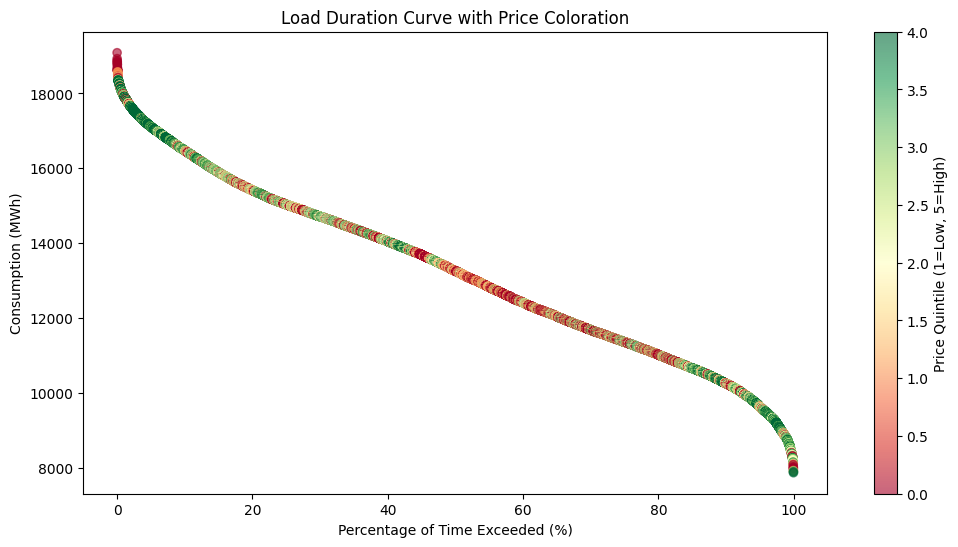

In [ ]:
path = 'delimiter/'
for full_name in os.listdir(path):
    name = full_name.split(".")[0]
    if 'price' in name.lower()   :
      df = pd.read_csv(path+full_name)
      df.set_index('End date', inplace=True)
      df.index = pd.to_datetime(df.index)
      df.drop('Start date', axis=1, inplace=True)

    if ('consumption' in name.lower() and 'actual' in name.lower()):
      cons = pd.read_csv(path+full_name)
      cons.set_index('End date', inplace=True)
      cons.index = pd.to_datetime(cons.index)
      cons.drop('Start date', axis=1, inplace=True)
# Combine consumption and pricing data
combined = pd.merge(cons['Total (grid load) [MWh] Original resolutions'],
                    df.mean(axis=1).rename('Average Price'),
                    left_index=True, right_index=True, how='inner')

# Create load duration curve
sorted_load = combined.sort_values('Total (grid load) [MWh] Original resolutions', ascending=False)
sorted_load['rank'] = np.arange(len(sorted_load)) / len(sorted_load) * 100

# Create price bands
price_bands = pd.qcut(combined['Average Price'], 5, labels=False)

plt.figure(figsize=(12,6))
plt.scatter(sorted_load['rank'], sorted_load['Total (grid load) [MWh] Original resolutions'],
            c=price_bands, cmap='RdYlGn', alpha=0.6)
plt.colorbar(label='Price Quintile (1=Low, 5=High)')
plt.title('Load Duration Curve with Price Coloration')
plt.xlabel('Percentage of Time Exceeded (%)')
plt.ylabel('Consumption (MWh)')


Text(0, 0.5, 'Correlation Coefficient')

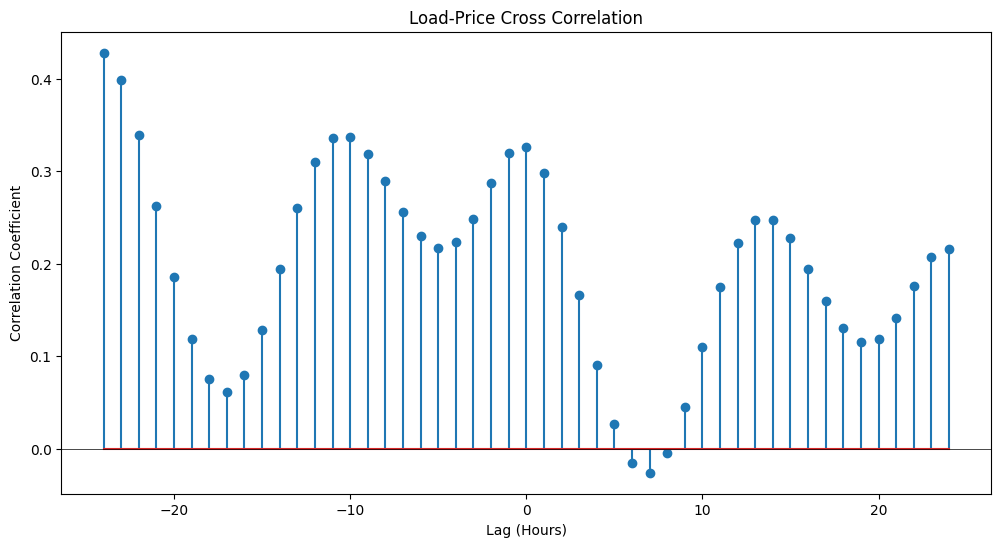

In [ ]:
from statsmodels.tsa.stattools import ccf
path = 'delimiter/'
for full_name in os.listdir(path):
    name = full_name.split(".")[0]
    if 'price' in name.lower()   :
      df = pd.read_csv(path+full_name)
      df.set_index('End date', inplace=True)
      df.index = pd.to_datetime(df.index)
      df.drop('Start date', axis=1, inplace=True)

    if ('consumption' in name.lower() and 'actual' in name.lower()):
      cons = pd.read_csv(path+full_name)
      cons.set_index('End date', inplace=True)
      cons.index = pd.to_datetime(cons.index)
      cons.drop('Start date', axis=1, inplace=True)
# Combine consumption and pricing data
combined = pd.merge(cons['Total (grid load) [MWh] Original resolutions'],
                    df.mean(axis=1).rename('Average Price'),
                    left_index=True, right_index=True, how='inner')
# Resample to consistent frequency
combined_hourly = combined.resample('H').mean().dropna()

# Compute cross-correlation
lags = np.arange(-24, 25)
correlations = ccf(combined_hourly['Total (grid load) [MWh] Original resolutions'],
                   combined_hourly['Average Price'], adjusted=False)

plt.figure(figsize=(12,6))
plt.stem(lags, correlations[:len(lags)])
plt.axhline(0, color='black', lw=0.5)
plt.title('Load-Price Cross Correlation')
plt.xlabel('Lag (Hours)')
plt.ylabel('Correlation Coefficient')


Text(0, 0.5, 'Price (€/MWh)')

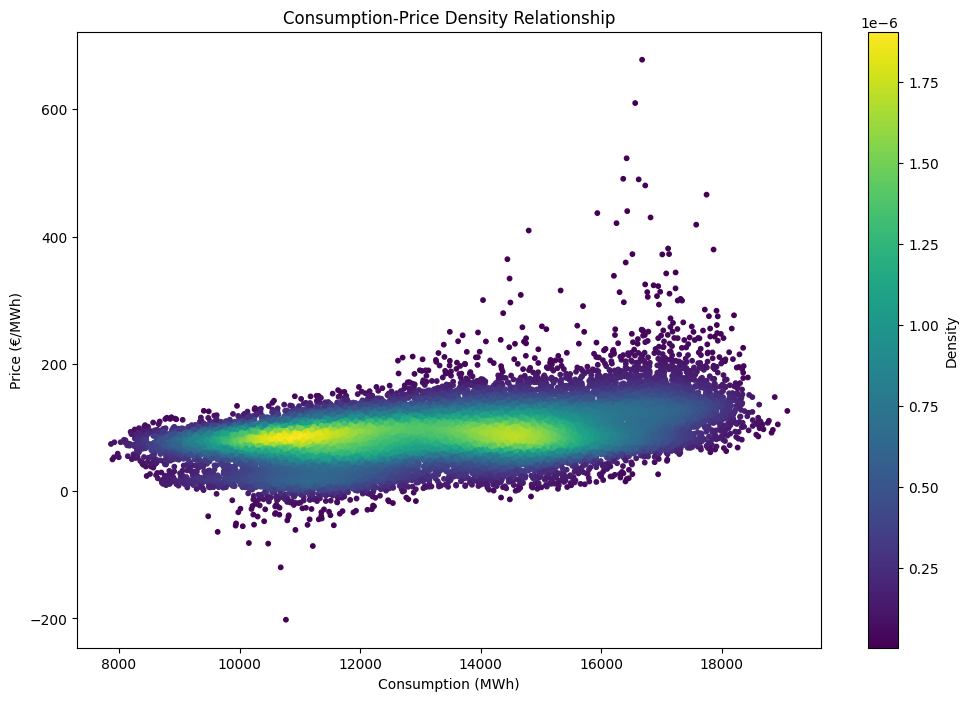

In [ ]:
from scipy.stats import gaussian_kde

# Compute 2D density
xy = np.vstack([combined_hourly['Total (grid load) [MWh] Original resolutions'],
               combined_hourly['Average Price']])
z = gaussian_kde(xy)(xy)

plt.figure(figsize=(12,8))
plt.scatter(combined_hourly['Total (grid load) [MWh] Original resolutions'],
           combined_hourly['Average Price'], c=z, s=10, cmap='viridis')
plt.colorbar(label='Density')
plt.title('Consumption-Price Density Relationship')
plt.xlabel('Consumption (MWh)')
plt.ylabel('Price (€/MWh)')



#### How does electricity generation (actual vs. forecast) align with price trends?


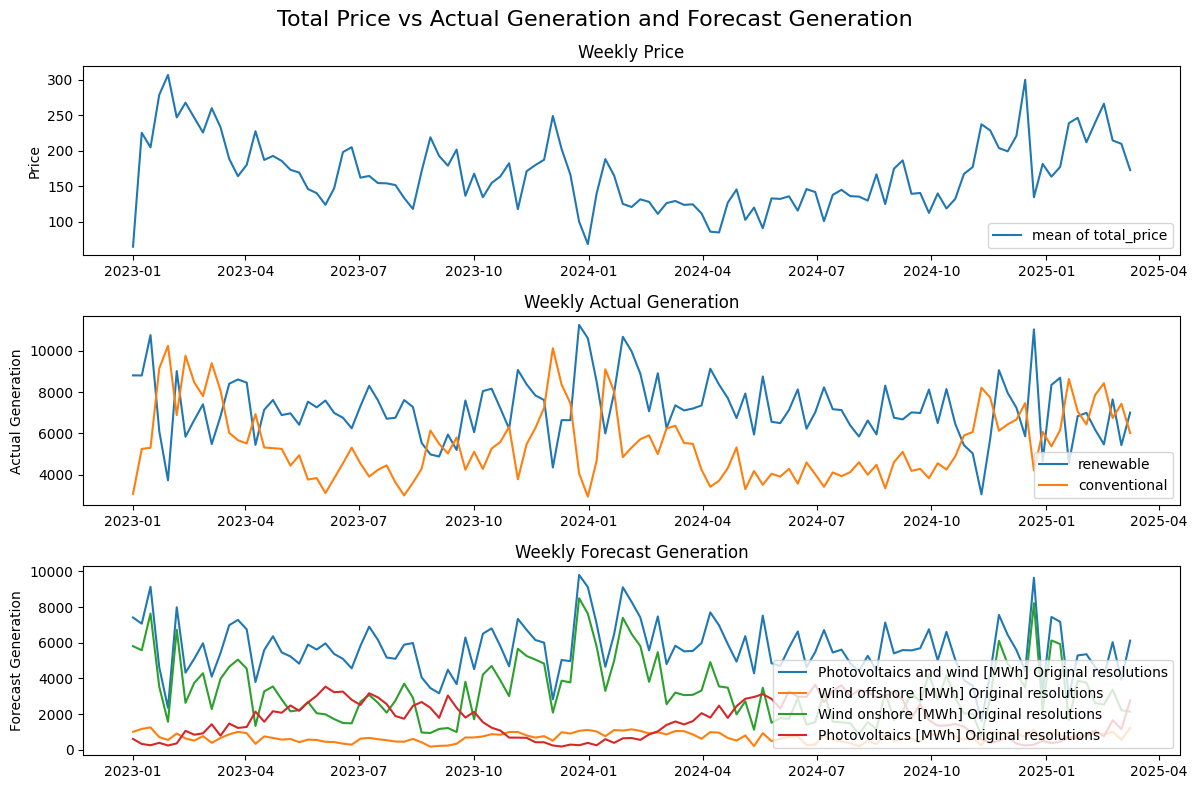

In [ ]:
path = 'delimiter/'
df = pd.read_csv(path+'Day-ahead_prices_202301010000_202503050000_Hour.csv')
df.set_index('End date', inplace=True)
df.index = pd.to_datetime(df.index)
df.drop('Start date', axis=1, inplace=True)
df['total_price'] = df.sum(axis=1)
# df['mean_total_price'] = df.mean(axis=1)

act_gen = pd.read_csv(path+'Actual_generation_202301010000_202503050000_Quarterhour.csv')
act_gen.set_index('End date', inplace=True)
act_gen.index = pd.to_datetime(act_gen.index)
act_gen.drop('Start date', axis=1, inplace=True)

cols = ['Wind offshore [MWh] Original resolutions',
  'Wind onshore [MWh] Original resolutions',
  'Photovoltaics [MWh] Original resolutions',]
renewable= ['Biomass [MWh] Original resolutions',
  'Hydropower [MWh] Original resolutions',
  'Wind offshore [MWh] Original resolutions',
  'Wind onshore [MWh] Original resolutions',
  'Photovoltaics [MWh] Original resolutions',
  'Other renewable [MWh] Original resolutions',]
conventional =['Nuclear [MWh] Original resolutions',
  'Lignite [MWh] Original resolutions',
  'Hard coal [MWh] Original resolutions',
  'Fossil gas [MWh] Original resolutions',
  'Hydro pumped storage [MWh] Original resolutions',
  'Other conventional [MWh] Original resolutions']

act_gen['Photovoltaics and wind [MWh] Original resolutions'] = act_gen[cols].sum(axis =1)
act_gen['renewable'] = act_gen[renewable].sum(axis =1)
act_gen['conventional'] = act_gen[conventional].sum(axis =1)
act_gen['Total Generation'] = act_gen.sum(axis =1)

fore_gen = pd.read_csv(path+'Generation_Forecast_Intraday_202301010000_202503050000_Quarterhour.csv')
fore_gen.set_index('End date', inplace=True)
fore_gen.index = pd.to_datetime(fore_gen.index)
fore_gen.drop('Start date', axis=1, inplace=True)

fig, axs = plt.subplots(3, figsize=(12, 8))
# Price
hourly_data = df.resample('W').mean()
hourly_data['total_price'] = hourly_data.mean(axis=1)
axs[0].plot(hourly_data.index, hourly_data['total_price'], label ='mean of total_price')
axs[0].set_title('Weekly Price')
axs[0].set_ylabel('Price')
axs[0].legend()

# actual generation
cols = ['renewable', 'conventional',
        # 'Total Generation'
        ]
for col in cols:
  hourly_data = act_gen.resample('W').mean()
  axs[1].plot(hourly_data.index, hourly_data[col], label =col)
  axs[1].set_ylabel('Actual Generation')
  axs[1].set_title('Weekly Actual Generation')
  axs[1].legend(loc='lower right')

# forecate generation
for col in fore_gen.columns:
  hourly_data = fore_gen.resample('W').mean()
  axs[2].plot(hourly_data.index, hourly_data[col], label =col)
  axs[2].set_ylabel('Forecast Generation')
  axs[2].set_title('Weekly Forecast Generation')
  axs[2].legend(loc='lower right')

for ax in axs:
  box = ax.get_position()
  ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

fig.suptitle('Total Price vs Actual Generation and Forecast Generation', fontsize=16 , )
plt.tight_layout()
plt.show()

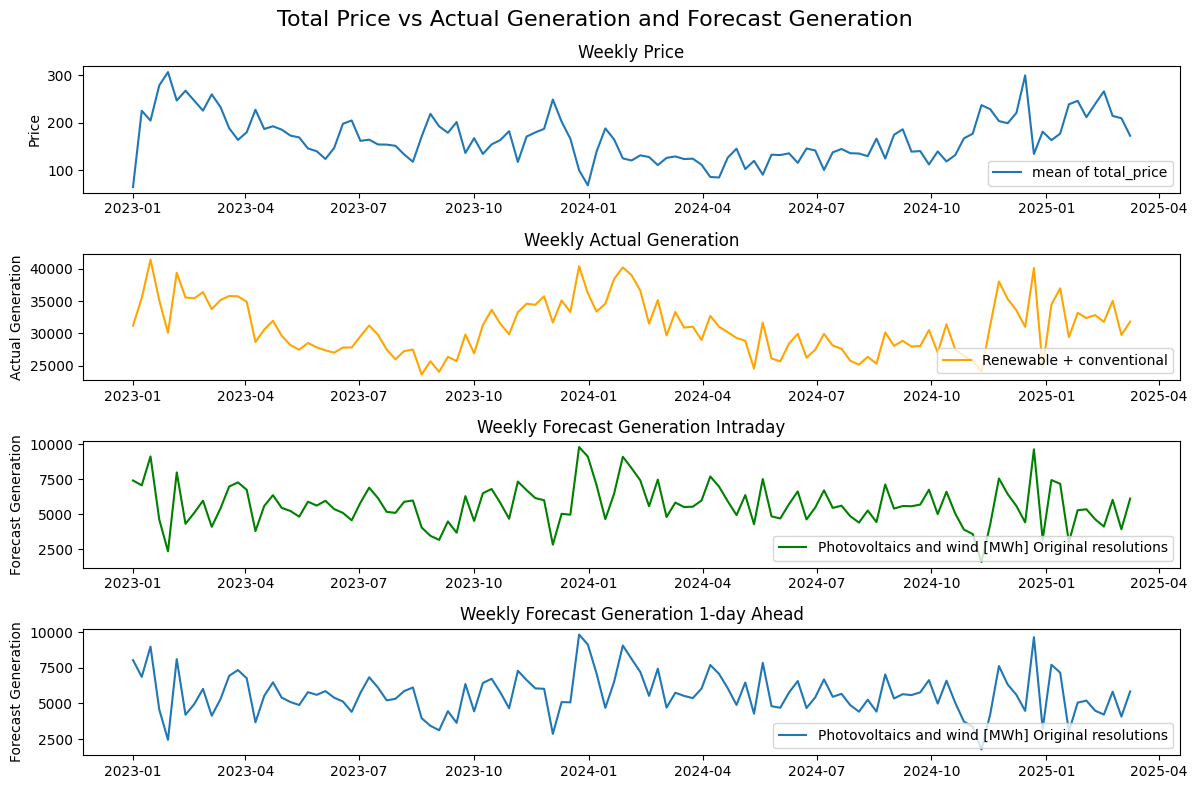

In [ ]:
path = 'delimiter/'
df = pd.read_csv(path+'Day-ahead_prices_202301010000_202503050000_Hour.csv')
df.set_index('End date', inplace=True)
df.index = pd.to_datetime(df.index)
df.drop('Start date', axis=1, inplace=True)
df['total_price'] = df.sum(axis=1)
# df['mean_total_price'] = df.mean(axis=1)

act_gen = pd.read_csv(path+'Actual_generation_202301010000_202503050000_Quarterhour.csv')
act_gen.set_index('End date', inplace=True)
act_gen.index = pd.to_datetime(act_gen.index)
act_gen.drop('Start date', axis=1, inplace=True)

cols = ['Wind offshore [MWh] Original resolutions',
  'Wind onshore [MWh] Original resolutions',
  'Photovoltaics [MWh] Original resolutions',]
renewable= ['Biomass [MWh] Original resolutions',
  'Hydropower [MWh] Original resolutions',
  'Wind offshore [MWh] Original resolutions',
  'Wind onshore [MWh] Original resolutions',
  'Photovoltaics [MWh] Original resolutions',
  'Other renewable [MWh] Original resolutions',]
conventional =['Nuclear [MWh] Original resolutions',
  'Lignite [MWh] Original resolutions',
  'Hard coal [MWh] Original resolutions',
  'Fossil gas [MWh] Original resolutions',
  'Hydro pumped storage [MWh] Original resolutions',
  'Other conventional [MWh] Original resolutions']

act_gen['Photovoltaics and wind [MWh] Original resolutions'] = act_gen[cols].sum(axis =1)
act_gen['renewable'] = act_gen[renewable].sum(axis =1)
act_gen['conventional'] = act_gen[conventional].sum(axis =1)
act_gen['Total Generation'] = act_gen.sum(axis =1)

fore_gen = pd.read_csv(path+'Generation_Forecast_Intraday_202301010000_202503050000_Quarterhour.csv')
fore_gen.set_index('End date', inplace=True)
fore_gen.index = pd.to_datetime(fore_gen.index)
fore_gen.drop('Start date', axis=1, inplace=True)

fore_gen_day_ahead = pd.read_csv(path+'Forecasted_generation_Day-Ahead_202301010000_202503050000_Hour_Quarterhour.csv')
fore_gen_day_ahead.set_index('End date', inplace=True)
fore_gen_day_ahead.index = pd.to_datetime(fore_gen_day_ahead.index)
fore_gen_day_ahead.drop('Start date', axis=1, inplace=True)

fig, axs = plt.subplots(4, figsize=(12, 8))
# Price
hourly_data = df.resample('W').mean()
hourly_data['total_price'] = hourly_data.mean(axis=1)
axs[0].plot(hourly_data.index, hourly_data['total_price'], label ='mean of total_price')
axs[0].set_title('Weekly Price')
axs[0].set_ylabel('Price')
axs[0].legend()

# actual generation
cols = [
        'Total Generation'
        ]
for col in cols:
  hourly_data = act_gen.resample('W').mean()
  axs[1].plot(hourly_data.index, hourly_data[col], label ='Renewable + conventional', color='orange')
  axs[1].set_ylabel('Actual Generation')
  axs[1].set_title('Weekly Actual Generation')
  axs[1].legend(loc='lower right')

# forecate generation
cols = ['Photovoltaics and wind [MWh] Original resolutions',
        # 'Total Generation'
        ]
for col in cols:
  hourly_data = fore_gen.resample('W').mean()
  axs[2].plot(hourly_data.index, hourly_data[col], label =col, color='green')
  axs[2].set_ylabel('Forecast Generation')
  axs[2].set_title('Weekly Forecast Generation Intraday')
  axs[2].legend(loc='lower right')
cols = ['Photovoltaics and wind [MWh] Original resolutions',
        # 'Total [MWh] Original resolutions'
        ]
for col in cols:
  hourly_data = fore_gen_day_ahead.resample('W').mean()
  axs[3].plot(hourly_data.index, hourly_data[col], label =col, )
  axs[3].set_ylabel('Forecast Generation')
  axs[3].set_title('Weekly Forecast Generation 1-day Ahead')
  axs[3].legend(loc='lower right')

for ax in axs:
  box = ax.get_position()
  ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

fig.suptitle('Total Price vs Actual Generation and Forecast Generation', fontsize=16 , )
plt.tight_layout()
plt.show()

In [ ]:
path = 'delimiter/'
df = pd.read_csv(path+'Day-ahead_prices_202301010000_202503050000_Hour.csv')
df.set_index('End date', inplace=True)
df.index = pd.to_datetime(df.index)
df.drop('Start date', axis=1, inplace=True)
df['total_price'] = df.sum(axis=1)
# df['mean_total_price'] = df.mean(axis=1)

act_gen = pd.read_csv(path+'Actual_generation_202301010000_202503050000_Quarterhour.csv')
act_gen.set_index('End date', inplace=True)
act_gen.index = pd.to_datetime(act_gen.index)
act_gen.drop('Start date', axis=1, inplace=True)

cols = ['Wind offshore [MWh] Original resolutions',
  'Wind onshore [MWh] Original resolutions',
  'Photovoltaics [MWh] Original resolutions',]
renewable= ['Biomass [MWh] Original resolutions',
  'Hydropower [MWh] Original resolutions',
  'Wind offshore [MWh] Original resolutions',
  'Wind onshore [MWh] Original resolutions',
  'Photovoltaics [MWh] Original resolutions',
  'Other renewable [MWh] Original resolutions',]
conventional =['Nuclear [MWh] Original resolutions',
  'Lignite [MWh] Original resolutions',
  'Hard coal [MWh] Original resolutions',
  'Fossil gas [MWh] Original resolutions',
  'Hydro pumped storage [MWh] Original resolutions',
  'Other conventional [MWh] Original resolutions']

act_gen['Photovoltaics and wind [MWh] Original resolutions'] = act_gen[cols].sum(axis =1)
act_gen['renewable'] = act_gen[renewable].sum(axis =1)
act_gen['conventional'] = act_gen[conventional].sum(axis =1)
act_gen['Total Generation'] = act_gen.sum(axis =1)

fore_gen = pd.read_csv(path+'Generation_Forecast_Intraday_202301010000_202503050000_Quarterhour.csv')
fore_gen.set_index('End date', inplace=True)
fore_gen.index = pd.to_datetime(fore_gen.index)
fore_gen.drop('Start date', axis=1, inplace=True)

Actual_generation_202301010000_202503050000_Quarterhour


Text(0.5, 1.0, 'Daily Correlation: Price vs Generation Sources')

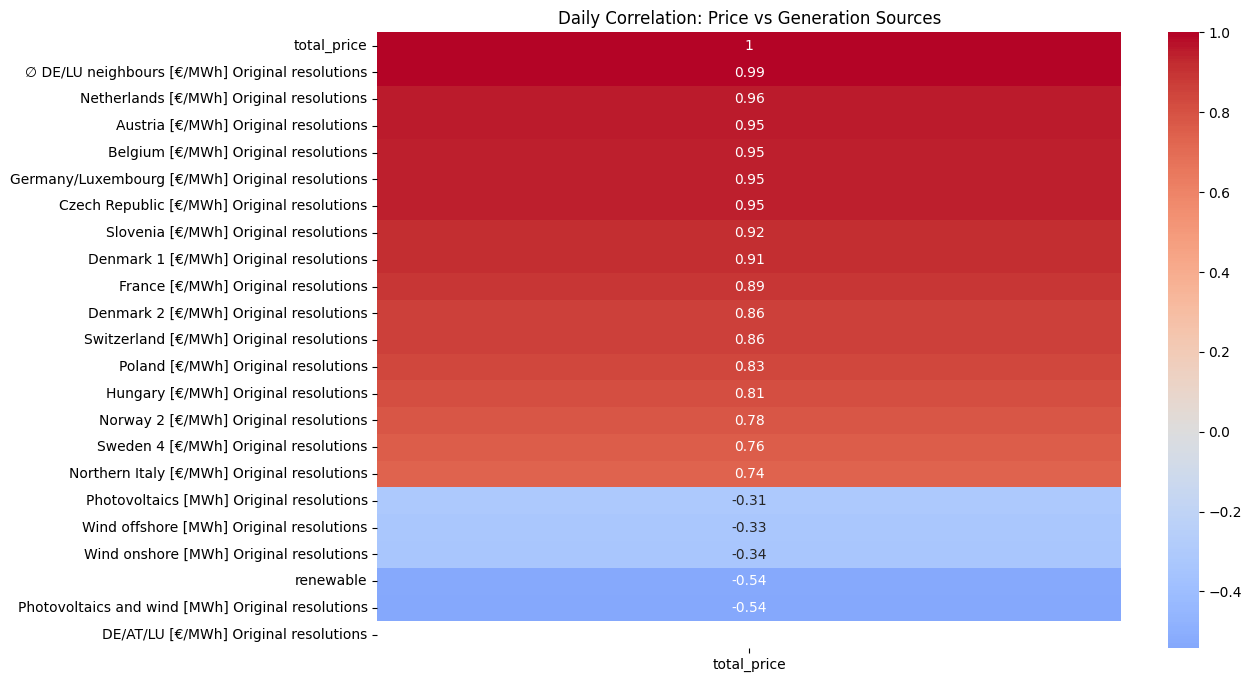

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# 1. Generation-Price Correlation Heatmap (Daily)
plt.figure(figsize=(12,8))
daily_data = df.join(act_gen['renewable']).join(fore_gen).resample('D').mean()
corr_matrix = daily_data.corr()
sns.heatmap(corr_matrix[['total_price']].sort_values(by='total_price', ascending=False),
            annot=True, cmap='coolwarm', center=0)
plt.title('Daily Correlation: Price vs Generation Sources')


Text(0.5, 1.0, 'Renewable Generation vs Price Relationship')

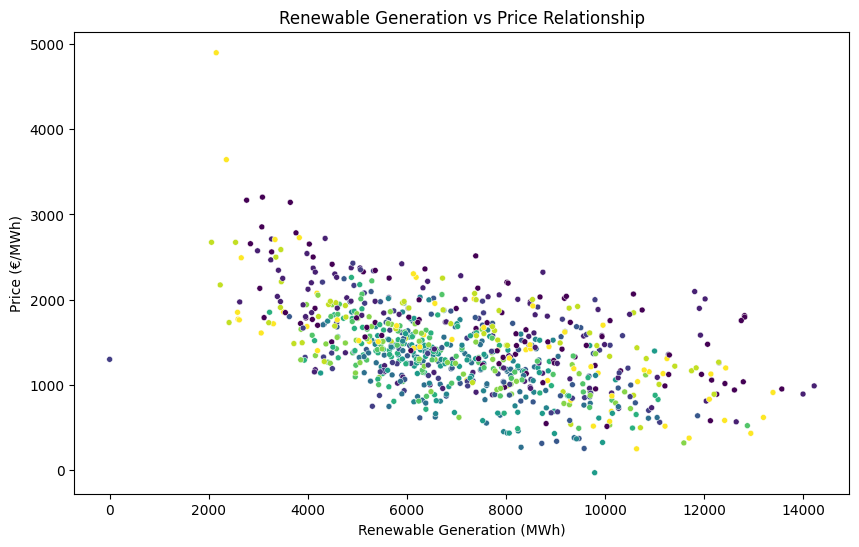

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=daily_data, x='renewable', y='total_price',
                hue=daily_data.index.month, palette='viridis', size=1)
plt.xlabel('Renewable Generation (MWh)')
plt.ylabel('Price (€/MWh)')
plt.legend('', frameon=False)
plt.title('Renewable Generation vs Price Relationship')


<Axes: >

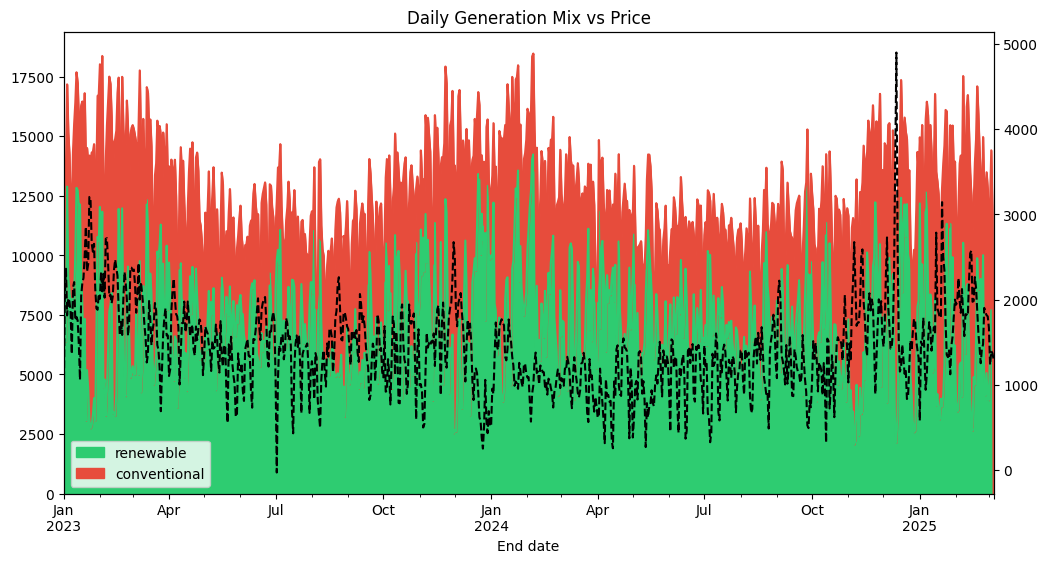

In [ ]:
act_gen.resample('D').mean()[['renewable','conventional']].plot.area(
    figsize=(12,6),
    color=['#2ecc71','#e74c3c'],
    title='Daily Generation Mix vs Price'
)
df['total_price'].resample('D').mean().plot(secondary_y=True, style='k--')


Text(0, 0.5, 'Forecast Error (MWh)')

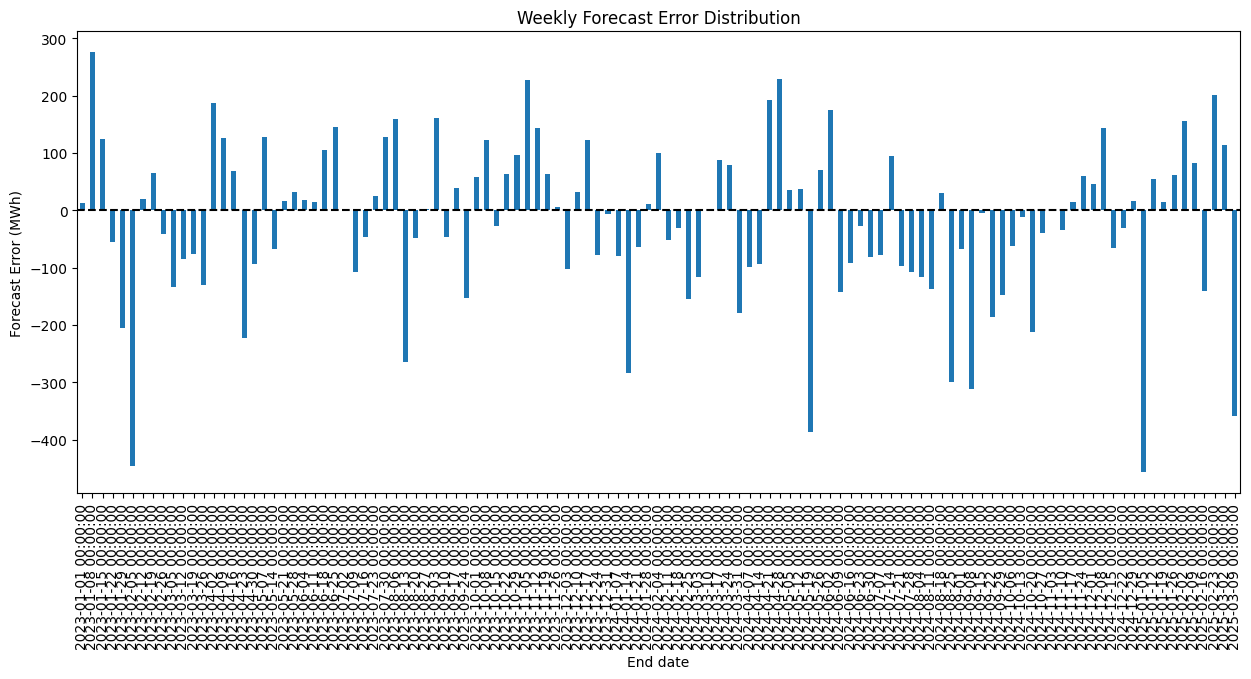

In [ ]:
forecast_error = act_gen['Photovoltaics and wind [MWh] Original resolutions'] - \
                fore_gen['Photovoltaics and wind [MWh] Original resolutions']

plt.figure(figsize=(15,6))
forecast_error.resample('W').mean().plot(kind='bar',
    title='Weekly Forecast Error Distribution')
plt.axhline(0, color='black', linestyle='--')
plt.ylabel('Forecast Error (MWh)')


Text(0.5, 1.0, 'Price Distribution by Renewable Generation Quartiles')

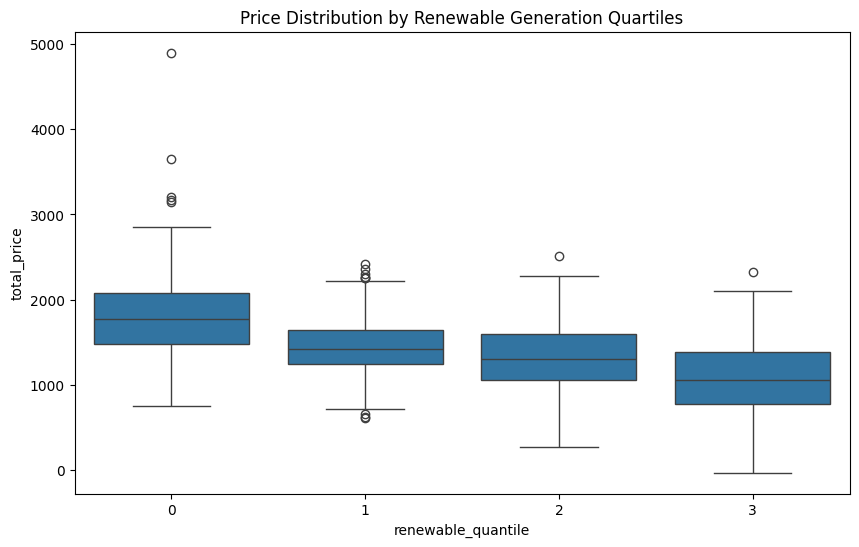

In [ ]:
daily_data['renewable_quantile'] = pd.qcut(daily_data['renewable'], 4, labels=False)
plt.figure(figsize=(10,6))
sns.boxplot(x='renewable_quantile', y='total_price', data=daily_data)
plt.title('Price Distribution by Renewable Generation Quartiles')



#### How does electricity generation (actual vs. forecast day ahead) align with price trends?


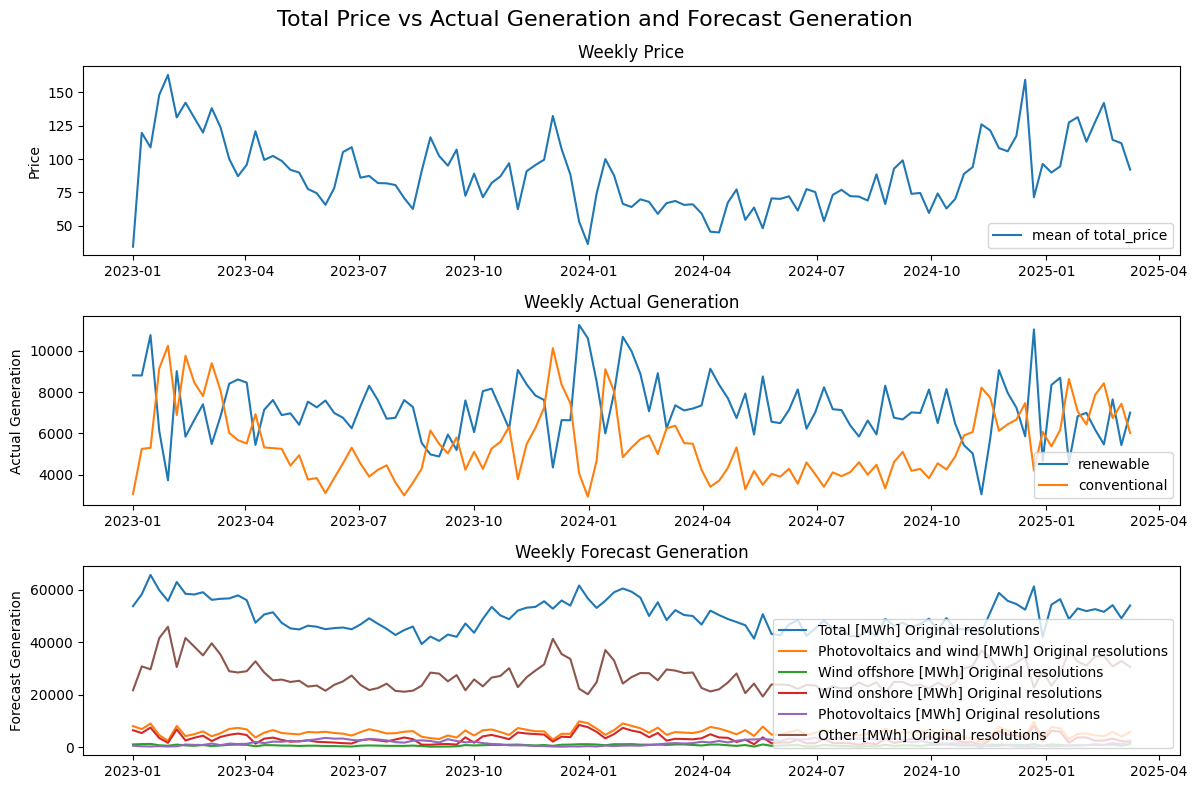

In [ ]:
path = 'delimiter/'
for full_name in os.listdir(path):
    name = full_name.split(".")[0]
    if 'price' in name.lower()  :
      df = pd.read_csv(path+full_name)
      df.set_index('End date', inplace=True)
      df.index = pd.to_datetime(df.index)
      df.drop('Start date', axis=1, inplace=True)

    if ('generation' in name.lower() and 'actual' in name.lower()):
      act_gen = pd.read_csv(path+full_name)
      act_gen.set_index('End date', inplace=True)
      act_gen.index = pd.to_datetime(act_gen.index)
      act_gen.drop('Start date', axis=1, inplace=True)

      cols = ['Wind offshore [MWh] Original resolutions',
       'Wind onshore [MWh] Original resolutions',
       'Photovoltaics [MWh] Original resolutions',]
      renewable= ['Biomass [MWh] Original resolutions',
       'Hydropower [MWh] Original resolutions',
       'Wind offshore [MWh] Original resolutions',
       'Wind onshore [MWh] Original resolutions',
       'Photovoltaics [MWh] Original resolutions',
       'Other renewable [MWh] Original resolutions',]
      conventional =['Nuclear [MWh] Original resolutions',
       'Lignite [MWh] Original resolutions',
       'Hard coal [MWh] Original resolutions',
       'Fossil gas [MWh] Original resolutions',
       'Hydro pumped storage [MWh] Original resolutions',
       'Other conventional [MWh] Original resolutions']

      act_gen['Photovoltaics and wind [MWh] Original resolutions'] = act_gen[cols].sum(axis =1)
      act_gen['renewable'] = act_gen[renewable].sum(axis =1)
      act_gen['conventional'] = act_gen[conventional].sum(axis =1)
      act_gen['Total Generation'] = act_gen.sum(axis =1)

    if ('generation' in name.lower() and 'forecasted' in name.lower()):
      fore_gen = pd.read_csv(path+full_name)
      fore_gen.set_index('End date', inplace=True)
      fore_gen.index = pd.to_datetime(fore_gen.index)
      fore_gen.drop('Start date', axis=1, inplace=True)



fig, axs = plt.subplots(3, figsize=(12, 8))
# Price
hourly_data = df.resample('W').mean()
hourly_data['total_price'] = hourly_data.mean(axis=1)
axs[0].plot(hourly_data.index, hourly_data['total_price'], label ='mean of total_price')
axs[0].set_title('Weekly Price')
axs[0].set_ylabel('Price')
axs[0].legend()

# actual generation
cols = ['renewable', 'conventional',
        # 'Total Generation'
        ]
for col in cols:
  hourly_data = act_gen.resample('W').mean()
  axs[1].plot(hourly_data.index, hourly_data[col], label =col)
  axs[1].set_ylabel('Actual Generation')
  axs[1].set_title('Weekly Actual Generation')
  axs[1].legend(loc='lower right')

# forecate generation
for col in fore_gen.columns:
  hourly_data = fore_gen.resample('W').mean()
  axs[2].plot(hourly_data.index, hourly_data[col], label =col)
  axs[2].set_ylabel('Forecast Generation')
  axs[2].set_title('Weekly Forecast Generation')
  axs[2].legend(loc='lower right')

for ax in axs:
  box = ax.get_position()
  ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

fig.suptitle('Total Price vs Actual Generation and Forecast Generation', fontsize=16 , )
plt.tight_layout()
plt.show()

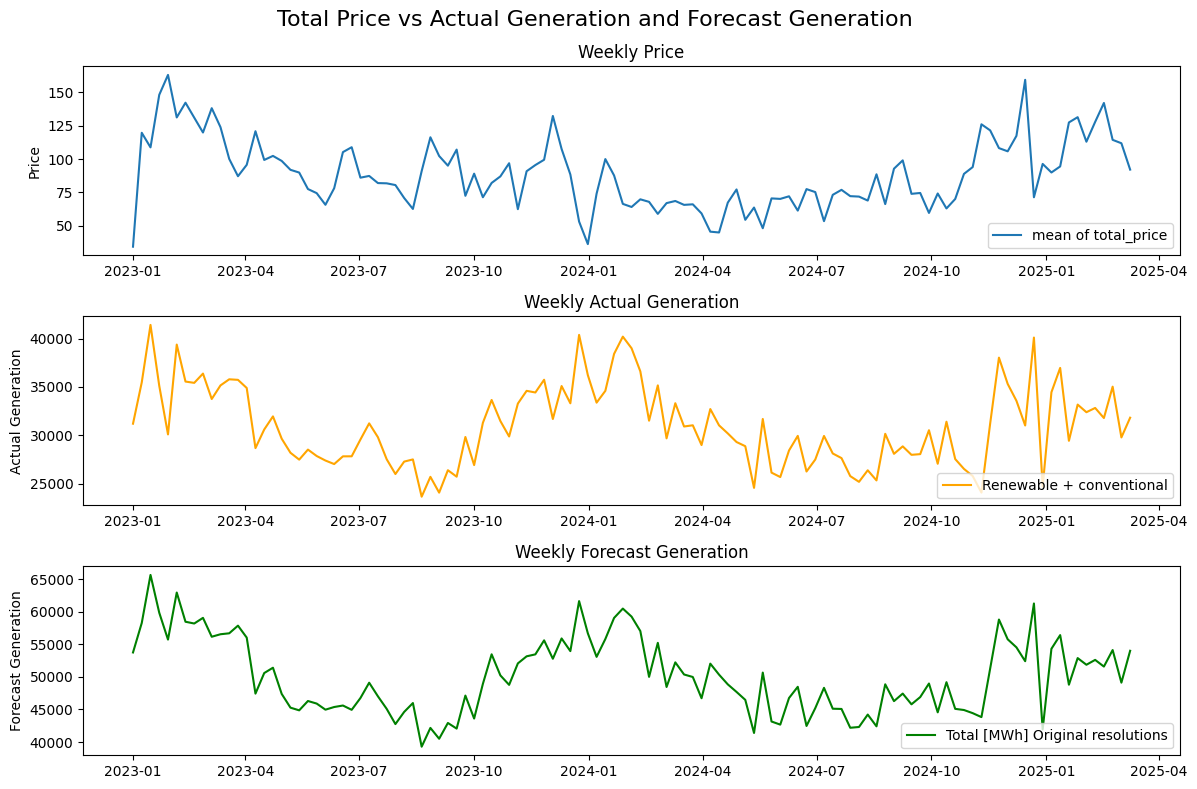

In [ ]:
path = 'delimiter/'
for full_name in os.listdir(path):
    name = full_name.split(".")[0]
    if 'price' in name.lower()   :
      df = pd.read_csv(path+full_name)
      df.set_index('End date', inplace=True)
      df.index = pd.to_datetime(df.index)
      df.drop('Start date', axis=1, inplace=True)

    if ('generation' in name.lower() and 'actual' in name.lower()):
      act_gen = pd.read_csv(path+full_name)
      act_gen.set_index('End date', inplace=True)
      act_gen.index = pd.to_datetime(act_gen.index)
      act_gen.drop('Start date', axis=1, inplace=True)

      cols = ['Wind offshore [MWh] Original resolutions',
       'Wind onshore [MWh] Original resolutions',
       'Photovoltaics [MWh] Original resolutions',]
      renewable= ['Biomass [MWh] Original resolutions',
       'Hydropower [MWh] Original resolutions',
       'Wind offshore [MWh] Original resolutions',
       'Wind onshore [MWh] Original resolutions',
       'Photovoltaics [MWh] Original resolutions',
       'Other renewable [MWh] Original resolutions',]
      conventional =['Nuclear [MWh] Original resolutions',
       'Lignite [MWh] Original resolutions',
       'Hard coal [MWh] Original resolutions',
       'Fossil gas [MWh] Original resolutions',
       'Hydro pumped storage [MWh] Original resolutions',
       'Other conventional [MWh] Original resolutions']

      act_gen['Photovoltaics and wind [MWh] Original resolutions'] = act_gen[cols].sum(axis =1)
      act_gen['renewable'] = act_gen[renewable].sum(axis =1)
      act_gen['conventional'] = act_gen[conventional].sum(axis =1)
      act_gen['Total Generation'] = act_gen.sum(axis =1)

    if ('generation' in name.lower() and 'forecasted' in name.lower()):
      fore_gen = pd.read_csv(path+full_name)
      fore_gen.set_index('End date', inplace=True)
      fore_gen.index = pd.to_datetime(fore_gen.index)
      fore_gen.drop('Start date', axis=1, inplace=True)



fig, axs = plt.subplots(3, figsize=(12, 8))
# Price
hourly_data = df.resample('W').mean()
hourly_data['total_price'] = hourly_data.mean(axis=1)
axs[0].plot(hourly_data.index, hourly_data['total_price'], label ='mean of total_price')
axs[0].set_title('Weekly Price')
axs[0].set_ylabel('Price')
axs[0].legend()

# actual generation
cols = [
        'Total Generation'
        ]
for col in cols:
  hourly_data = act_gen.resample('W').mean()
  axs[1].plot(hourly_data.index, hourly_data[col], label ='Renewable + conventional', color='orange')
  axs[1].set_ylabel('Actual Generation')
  axs[1].set_title('Weekly Actual Generation')
  axs[1].legend(loc='lower right')

# forecate generation
cols = ['Total [MWh] Original resolutions',
        # 'Total Generation'
        ]
for col in cols:
  hourly_data = fore_gen.resample('W').mean()
  axs[2].plot(hourly_data.index, hourly_data[col], label =col, color='green')
  axs[2].set_ylabel('Forecast Generation')
  axs[2].set_title('Weekly Forecast Generation')
  axs[2].legend(loc='lower right')

for ax in axs:
  box = ax.get_position()
  ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

fig.suptitle('Total Price vs Actual Generation and Forecast Generation', fontsize=16 , )
plt.tight_layout()
plt.show()

In [ ]:
path = 'delimiter/'
for full_name in os.listdir(path):
    name = full_name.split(".")[0]
    if 'price' in name.lower()   :
      df = pd.read_csv(path+full_name)
      df.set_index('End date', inplace=True)
      df.index = pd.to_datetime(df.index)
      df.drop('Start date', axis=1, inplace=True)
      df['total_price'] = df.sum(axis=1)
      # df['mean_total_price'] = df.mean(axis=1)
    if ('generation' in name.lower() and 'actual' in name.lower()):
      act_gen = pd.read_csv(path+full_name)
      act_gen.set_index('End date', inplace=True)
      act_gen.index = pd.to_datetime(act_gen.index)
      act_gen.drop('Start date', axis=1, inplace=True)

      cols = ['Wind offshore [MWh] Original resolutions',
       'Wind onshore [MWh] Original resolutions',
       'Photovoltaics [MWh] Original resolutions',]
      renewable= ['Biomass [MWh] Original resolutions',
       'Hydropower [MWh] Original resolutions',
       'Wind offshore [MWh] Original resolutions',
       'Wind onshore [MWh] Original resolutions',
       'Photovoltaics [MWh] Original resolutions',
       'Other renewable [MWh] Original resolutions',]
      conventional =['Nuclear [MWh] Original resolutions',
       'Lignite [MWh] Original resolutions',
       'Hard coal [MWh] Original resolutions',
       'Fossil gas [MWh] Original resolutions',
       'Hydro pumped storage [MWh] Original resolutions',
       'Other conventional [MWh] Original resolutions']

      act_gen['Photovoltaics and wind [MWh] Original resolutions'] = act_gen[cols].sum(axis =1)
      act_gen['renewable'] = act_gen[renewable].sum(axis =1)
      act_gen['conventional'] = act_gen[conventional].sum(axis =1)
      act_gen['Total Generation'] = act_gen.sum(axis =1)

    if ('generation' in name.lower() and 'forecasted' in name.lower()):
      fore_gen = pd.read_csv(path+full_name)
      fore_gen.set_index('End date', inplace=True)
      fore_gen.index = pd.to_datetime(fore_gen.index)
      fore_gen.drop('Start date', axis=1, inplace=True)

Text(0.5, 1.0, 'Daily Correlation: Price vs Generation Sources')

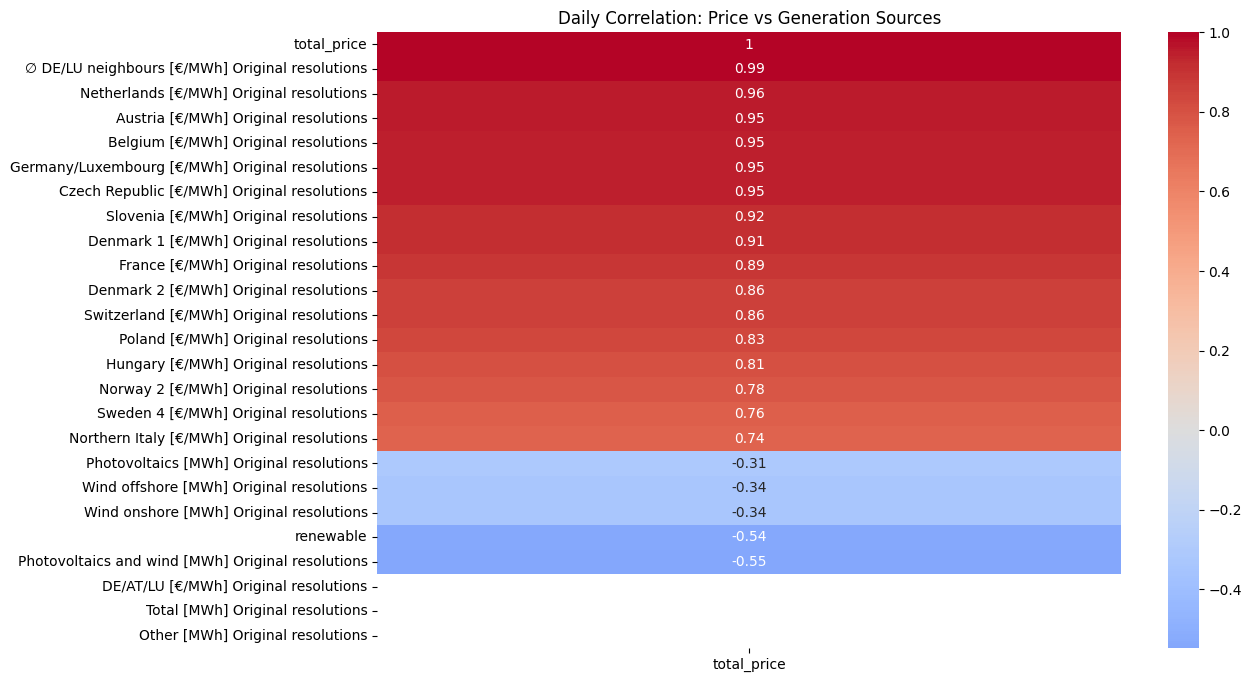

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# 1. Generation-Price Correlation Heatmap (Daily)
plt.figure(figsize=(12,8))
daily_data = df.join(act_gen['renewable']).join(fore_gen).resample('D').mean()
corr_matrix = daily_data.corr()
sns.heatmap(corr_matrix[['total_price']].sort_values(by='total_price', ascending=False),
            annot=True, cmap='coolwarm', center=0)
plt.title('Daily Correlation: Price vs Generation Sources')


Text(0.5, 1.0, 'Renewable Generation vs Price Relationship')

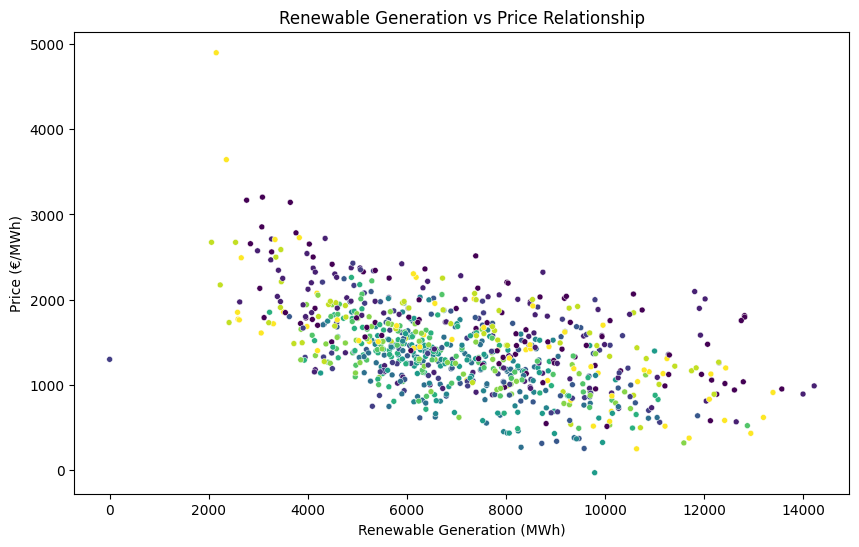

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=daily_data, x='renewable', y='total_price',
                hue=daily_data.index.month, palette='viridis', size=1)
plt.xlabel('Renewable Generation (MWh)')
plt.ylabel('Price (€/MWh)')
plt.legend('', frameon=False)
plt.title('Renewable Generation vs Price Relationship')


<Axes: >

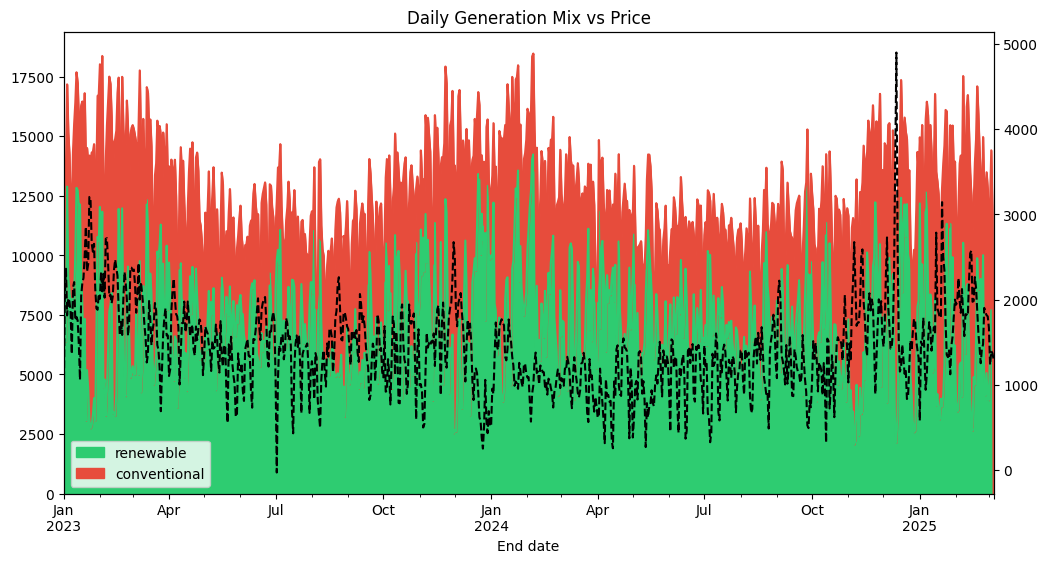

In [ ]:
act_gen.resample('D').mean()[['renewable','conventional']].plot.area(
    figsize=(12,6),
    color=['#2ecc71','#e74c3c'],
    title='Daily Generation Mix vs Price'
)
df['total_price'].resample('D').mean().plot(secondary_y=True, style='k--')


Text(0, 0.5, 'Forecast Error (MWh)')

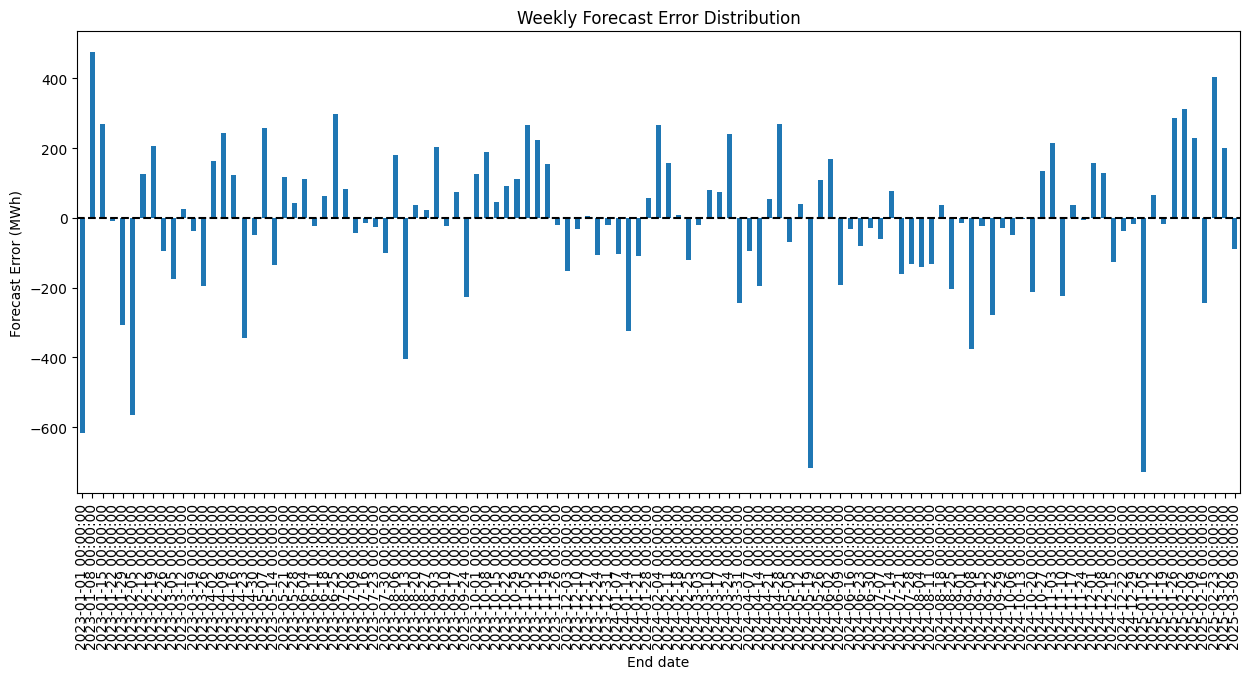

In [ ]:
forecast_error = act_gen['Photovoltaics and wind [MWh] Original resolutions'] - \
                fore_gen['Photovoltaics and wind [MWh] Original resolutions']

plt.figure(figsize=(15,6))
forecast_error.resample('W').mean().plot(kind='bar',
    title='Weekly Forecast Error Distribution')
plt.axhline(0, color='black', linestyle='--')
plt.ylabel('Forecast Error (MWh)')


Text(0.5, 1.0, 'Price Distribution by Renewable Generation Quartiles')

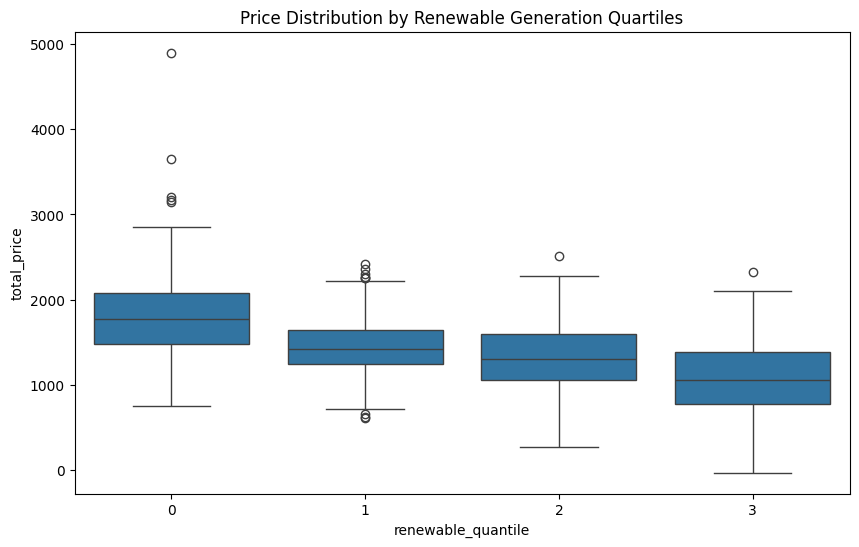

In [ ]:
daily_data['renewable_quantile'] = pd.qcut(daily_data['renewable'], 4, labels=False)
plt.figure(figsize=(10,6))
sns.boxplot(x='renewable_quantile', y='total_price', data=daily_data)
plt.title('Price Distribution by Renewable Generation Quartiles')



#### What patterns emerge from scheduled commercial exchanges and cross-border physical flows?

In [ ]:
scheduled.columns.str.replace("Original resolutions", "").str.strip()

Index(['Start date', 'Net export [MWh]', 'Netherlands (export) [MWh]',
       'Netherlands (import) [MWh]', 'Switzerland (export) [MWh]',
       'Switzerland (import) [MWh]', 'Denmark (export) [MWh]',
       'Denmark (import) [MWh]', 'Czech Republic (export) [MWh]',
       'Czech Republic (import) [MWh]', 'Luxembourg (export) [MWh]',
       'Luxembourg (import) [MWh]', 'Sweden (export) [MWh]',
       'Sweden (import) [MWh]', 'Austria (export) [MWh]',
       'Austria (import) [MWh]', 'France (export) [MWh]',
       'France (import) [MWh]', 'Poland (export) [MWh]',
       'Poland (import) [MWh]', 'Norway (export) [MWh]',
       'Norway (import) [MWh]', 'Belgium (export) [MWh]',
       'Belgium (import) [MWh]'],
      dtype='object')

In [ ]:
merged.columns

Index(['Net export [MWh]', 'Netherlands (export) [MWh]',
       'Netherlands (import) [MWh]', 'Switzerland (export) [MWh]',
       'Switzerland (import) [MWh]', 'Denmark (export) [MWh]',
       'Denmark (import) [MWh]', 'Czech Republic (export) [MWh]',
       'Czech Republic (import) [MWh]', 'Luxembourg (export) [MWh]',
       'Luxembourg (import) [MWh]', 'Sweden (export) [MWh]',
       'Sweden (import) [MWh]', 'Austria (export) [MWh]',
       'Austria (import) [MWh]', 'France (export) [MWh]',
       'France (import) [MWh]', 'Poland (export) [MWh]',
       'Poland (import) [MWh]', 'Norway (export) [MWh]',
       'Norway (import) [MWh]', 'Belgium (export) [MWh]',
       'Belgium (import) [MWh]', 'Net export [MWh]_CB',
       'Netherlands (export) [MWh]_CB', 'Netherlands (import) [MWh]_CB',
       'Switzerland (export) [MWh]_CB', 'Switzerland (import) [MWh]_CB',
       'Denmark (export) [MWh]_CB', 'Denmark (import) [MWh]_CB',
       'Czech Republic (export) [MWh]_CB', 'Czech Republic (im

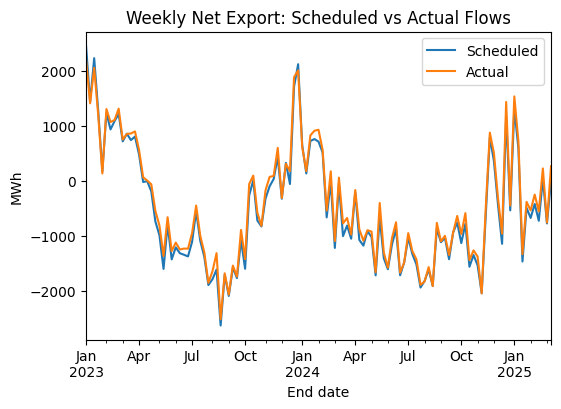

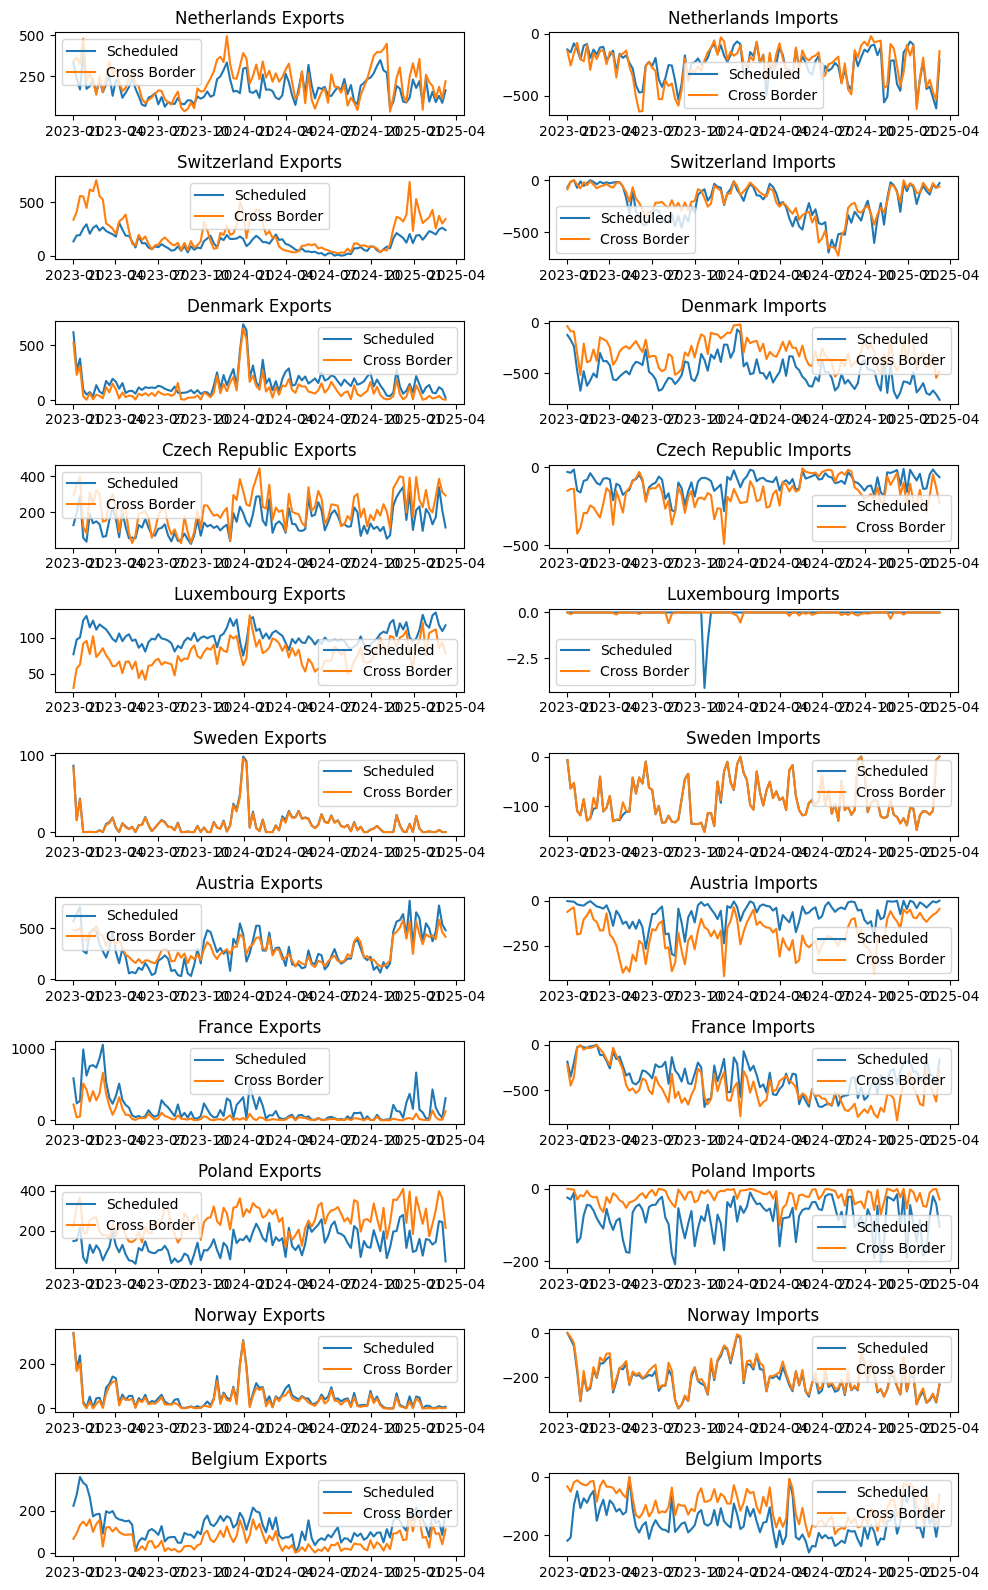

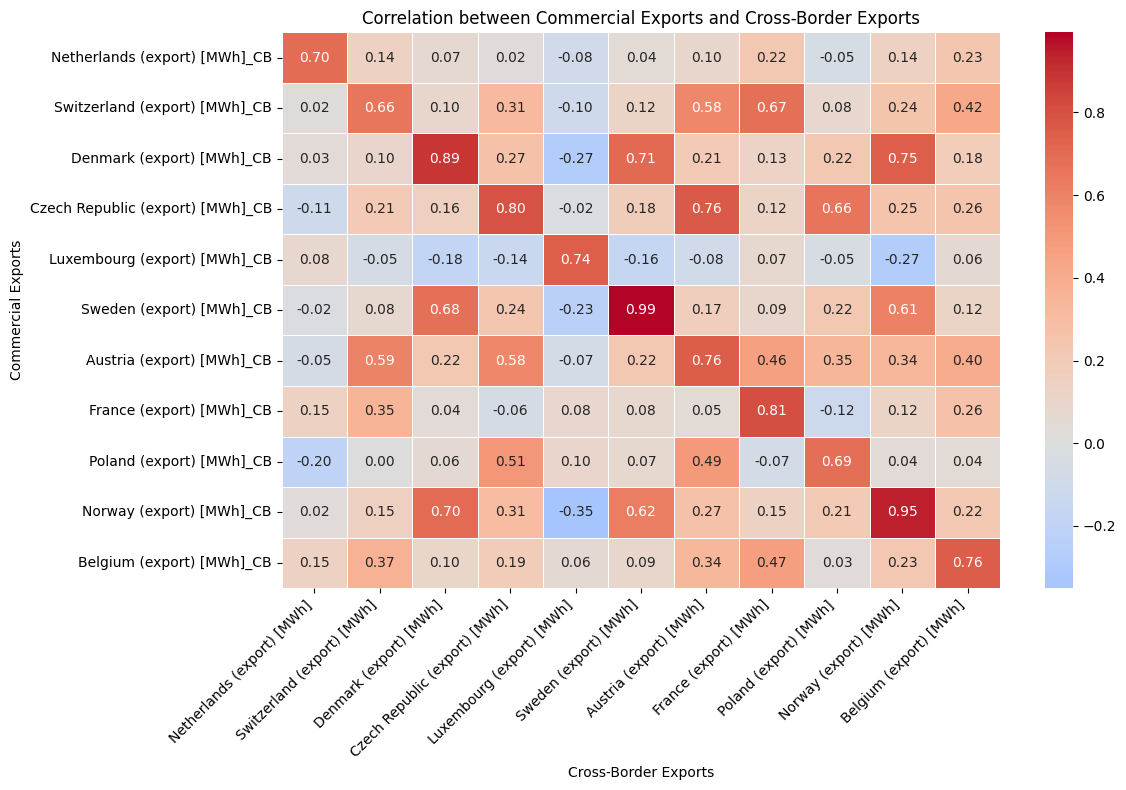

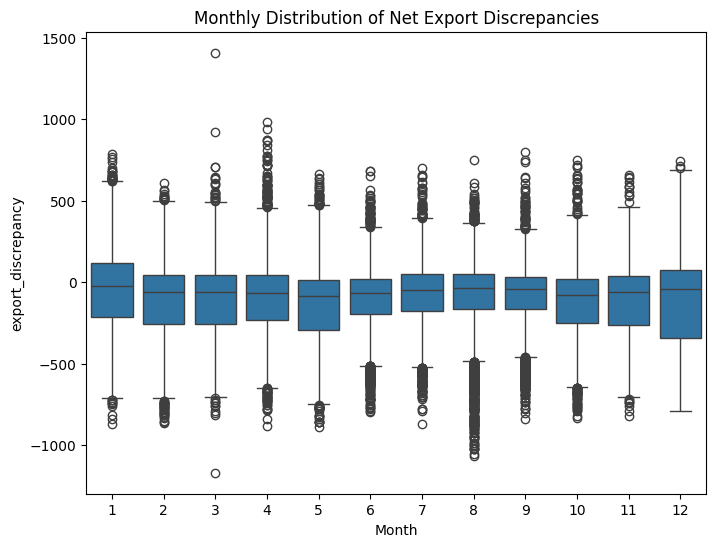

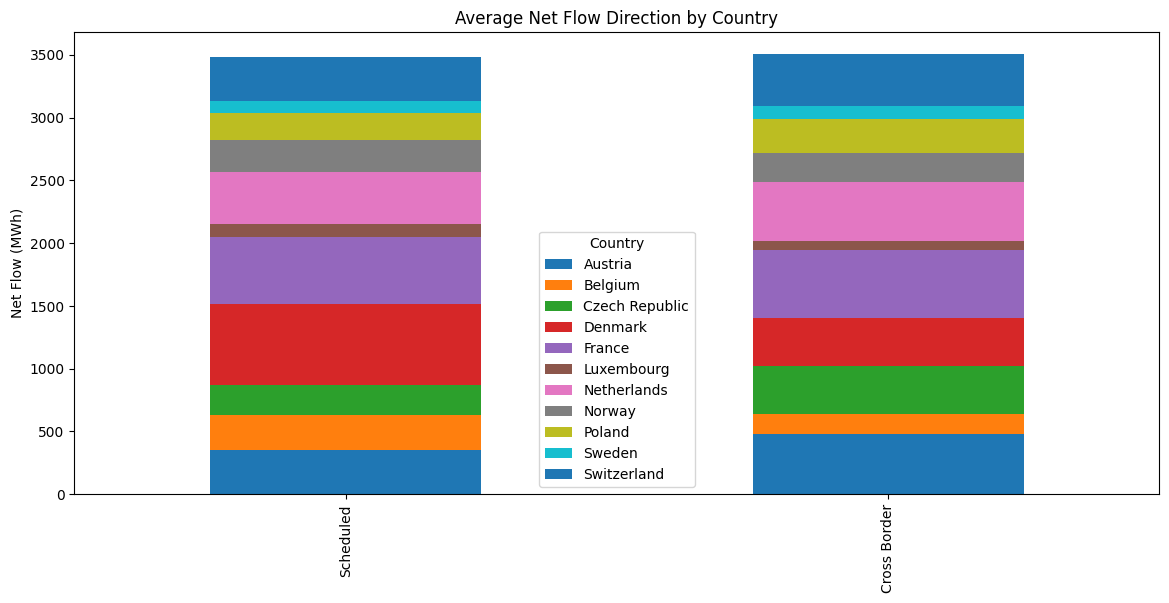

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load and prepare data (adjust path)
path = 'delimiter/'
scheduled = pd.read_csv(path+'Scheduled_commercial_exchanges_202301010000_202503050000_Quarterhour.csv', parse_dates=['End date'], index_col='End date')
CB = pd.read_csv(path+'Cross-border_physical_flows_202301010000_202503050000_Quarterhour.csv', parse_dates=['End date'], index_col='End date')
scheduled.columns = scheduled.columns.str.replace("Original resolutions", "").str.strip()
CB.columns = CB.columns.str.replace("Original resolutions", "").str.strip()

scheduled.drop(columns=['Start date'], inplace=True)
CB.drop(columns=['Start date'], inplace=True)
# Merge datasets
merged = scheduled.join(CB, rsuffix='_CB', how='inner')

# 1. Time Series Comparison
plt.figure(figsize=(6,4))
merged['Net export [MWh]'].resample('W').mean().plot(label='Scheduled')
merged['Net export [MWh]_CB'].resample('W').mean().plot(label='Actual')
plt.title('Weekly Net Export: Scheduled vs Actual Flows')
plt.ylabel('MWh')
plt.legend()
plt.show()

# 2. Country-Specific Flow Discrepancies
countries = ['Netherlands' , 'Switzerland', 'Denmark', 'Czech Republic', 'Luxembourg',
             'Sweden', 'Austria', 'France', 'Poland', 'Norway', 'Belgium']
fig, axs = plt.subplots(len(countries), 2, figsize=(10,16))
for idx, country in enumerate(countries):
    # Exports
    axs[idx,0].plot(merged[f'{country} (export) [MWh]'].resample('W').mean(), label='Scheduled')
    axs[idx,0].plot(merged[f'{country} (export) [MWh]_CB'].resample('W').mean(), label='Cross Border')
    axs[idx,0].set_title(f'{country} Exports')
    axs[idx,0].legend()
    # Imports
    axs[idx,1].plot(merged[f'{country} (import) [MWh]'].resample('W').mean(), label='Scheduled')
    axs[idx,1].plot(merged[f'{country} (import) [MWh]_CB'].resample('W').mean(), label='Cross Border')
    axs[idx,1].set_title(f'{country} Imports')
    axs[idx,1].legend()
plt.tight_layout()
plt.show()

# 3. Correlation Heatmap
commercial_exports = merged.filter(regex='\(export\) \[MWh\]$')
crossborder_exports = merged.filter(regex='\(export\) \[MWh\]_CB$')

corr_matrix = commercial_exports.apply(
    lambda col: crossborder_exports.corrwith(col)
)
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    linewidths=0.5
)
plt.title('Correlation between Commercial Exports and Cross-Border Exports')
plt.xlabel('Cross-Border Exports')
plt.ylabel('Commercial Exports')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# # 4. Scatterplot Matrix
# plot_cols = countries = ['Netherlands (export)' , 'Switzerland (export)', 'Denmark (export)', 'Czech Republic (export)', 'Luxembourg (export)',
#              'Sweden (export)', 'Austria (export)', 'France (export)', 'Poland (export)', 'Norway (export)', 'Belgium (export)']
# sns.pairplot(merged.resample('W').mean().filter(regex='|'.join(plot_cols)),
#              diag_kind='kde',
#              plot_kws={'alpha': 0.6})
# plt.suptitle('Scheduled vs Actual Flow Relationships', y=1.02)
# plt.show()

# 5. Flow Discrepancy Analysis
# Convert index to datetime and extract month
merged['month'] = merged.index.to_series().dt.month
merged['export_discrepancy'] = merged['Net export [MWh]'] - \
merged['Net export [MWh]_CB']
temp = pd.DataFrame()
temp[['month','export_discrepancy']] = merged[['month','export_discrepancy']]
plt.figure(figsize=(8,6))
sns.boxplot(
    x='month',
    y='export_discrepancy',
    data = temp.reset_index()
)
plt.title('Monthly Distribution of Net Export Discrepancies')
plt.xlabel('Month')
plt.show()

# 6. Directional Flow Analysis
country_flows = []
for country in countries:
    net_scheduled = merged[f'{country} (export) [MWh]'] - \
                   merged[f'{country} (import) [MWh]']
    net_CB = merged[f'{country} (export) [MWh]_CB'] - \
                merged[f'{country} (import) [MWh]_CB']
    country_flows.append(pd.DataFrame({
        'Country': country,
        'Scheduled': net_scheduled,
        'Cross Border': net_CB
    }))

flow_df = pd.concat(country_flows).groupby('Country').mean().T
flow_df.plot(kind='bar', stacked=True, figsize=(14,6))
plt.title('Average Net Flow Direction by Country')
plt.ylabel('Net Flow (MWh)')
plt.show()
